In [2]:
import csv
import datetime
import random
import os

from itertools import product

import matplotlib.pyplot as plt
import numpy as np

import gurobipy as gp
from gurobipy import GRB

import pulp
from scipy.optimize import minimize

# 1. Import Crosstalk Matrix

In [3]:
crosstalk_matrix_directory = r'C:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice'
crosstalk_matrix_directory= r'V:\QSimMeasurements\Measurements\4Q_Triangle_Lattice\crosstalk_matrices'

number_of_ports = 2

crosstalk_matrix_filename = os.path.join(crosstalk_matrix_directory, 'crosstalk_matrix.csv')
crosstalk_inverse_matrix_filename = os.path.join(crosstalk_matrix_directory, 'crosstalk_inverse_matrix.csv')
crosstalk_offset_vector_filename = os.path.join(crosstalk_matrix_directory, 'crosstalk_offset_vector.csv')

crosstalk_matrix_filename = os.path.join(crosstalk_matrix_directory, 'crosstalk_matrix_2.csv')
crosstalk_inverse_matrix_filename = os.path.join(crosstalk_matrix_directory, 'crosstalk_inverse_matrix_2.csv')
crosstalk_offset_vector_filename = os.path.join(crosstalk_matrix_directory, 'crosstalk_offset_vector_2.csv')

crosstalk_matrix_filename = os.path.join(crosstalk_matrix_directory, 'crosstalk_matrix_3.csv')
crosstalk_inverse_matrix_filename = os.path.join(crosstalk_matrix_directory, 'crosstalk_inverse_matrix_3.csv')
crosstalk_offset_vector_filename = os.path.join(crosstalk_matrix_directory, 'crosstalk_offset_vector_3.csv')

crosstalk_matrix_filename = 'crosstalk_matrix_4.csv'
crosstalk_inverse_matrix_filename = 'crosstalk_inverse_matrix_4.csv'
crosstalk_offset_vector_filename = 'crosstalk_offset_vector_4.csv'

crosstalk_matrix = []
crosstalk_inverse_matrix = []
crosstalk_offset_vector = []

with open(crosstalk_matrix_filename, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        crosstalk_matrix.append(np.array(row).astype(float))
        
with open(crosstalk_inverse_matrix_filename, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        crosstalk_inverse_matrix.append(np.array(row).astype(float))
        
with open(crosstalk_offset_vector_filename, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        crosstalk_offset_vector.append(float(row[0]))
        
crosstalk_matrix = np.array(crosstalk_matrix)
crosstalk_inverse_matrix = np.array(crosstalk_inverse_matrix)
crosstalk_offset_vector = np.array(crosstalk_offset_vector)

crosstalk_voltage_offset_vector = np.dot(crosstalk_inverse_matrix, crosstalk_offset_vector)

print(np.round(crosstalk_matrix, 2))
print(np.round(crosstalk_inverse_matrix, 1))
print(np.round(crosstalk_offset_vector, 3))

[[ 0.36  0.    0.   -0.01 -0.01 -0.    0.01  0.01]
 [ 0.    0.37  0.   -0.   -0.01 -0.02  0.01  0.01]
 [-0.01  0.01  0.37 -0.01  0.01  0.01  0.01  0.02]
 [-0.18  0.18 -0.15  0.47  0.43  0.19  0.04  0.08]
 [ 0.14 -0.19  0.1   0.17  0.2  -0.2  -0.19 -0.18]
 [ 0.02 -0.04  0.    0.01 -0.02  0.34 -0.04  0.01]
 [-0.11  0.11 -0.09 -0.12 -0.    0.09  0.36  0.21]
 [ 0.13 -0.15 -0.25  0.03 -0.23 -0.32  0.32  0.55]]
[[  2.8   0.   -0.    0.    0.    0.   -0.   -0. ]
 [ -0.3   3.1  -0.1  -0.1   0.6   0.6   0.2   0.1]
 [  0.6  -0.8   2.8   0.3  -1.1  -1.   -0.6  -0.2]
 [ 12.2 -17.1   4.2   8.1 -24.4 -20.1 -12.4  -4.1]
 [-10.9  15.7  -3.5  -5.9  24.2  18.5  12.1   3.8]
 [  0.5  -0.5   0.1   0.3  -0.7   2.    0.1  -0.3]
 [ 12.4 -17.    3.5   6.5 -22.2 -20.2  -7.4  -5.1]
 [-12.6  17.5  -2.4  -6.4  23.4  21.4   9.8   6.3]]
[ 0.206 -0.227  0.188 -0.092 -0.631  0.378 -0.345  0.216]


In [4]:
[[ 3.56506239e-01  5.98930284e-04  2.56683787e-04 -7.60546646e-03
  -7.03505657e-03 -3.21503756e-03  6.46464649e-03  4.94355320e-03]
 [-1.22758709e-04  3.68459838e-01  1.27872793e-03 -4.41587613e-03
  -9.78653629e-03 -2.00504646e-02  1.00252323e-02  5.51387792e-03]
 [-8.98281244e-03  1.03206783e-02  3.68595651e-01 -5.05112557e-03
   7.64494680e-03  1.11943864e-02  1.40417391e-02  1.73571496e-02]
 [ 1.17140783e-01 -1.10110082e-01  1.35295542e-01  4.75059382e-01
   4.36116239e-01  2.00426681e-01  4.68713991e-02  8.66398537e-02]
 [ 1.35929499e-01 -1.90473023e-01  1.01088795e-01  1.65887284e-01
   2.04081633e-01 -1.97776039e-01 -1.93880445e-01 -1.75845100e-01]
 [ 1.68439900e-02 -3.92730204e-02  6.36048543e-04  6.35586638e-03
  -2.10957447e-02  3.42465753e-01 -3.59636937e-02  6.26680628e-03]
 [-1.05087024e-01  1.05325019e-01 -9.33291923e-02 -1.19914676e-01
  -2.13861078e-03  9.11974702e-02  3.57142857e-01  2.11146268e-01]
 [ 1.34011603e-01 -1.25968328e-01  1.54781042e-01  1.77198609e-02
  -2.12058220e-01 -2.95433009e-01  3.26511052e-01  5.43478261e-01]]
[[ 2.77708033e+00  2.97394714e-02 -2.36310934e-02  2.59344451e-02
   3.66627082e-02  3.29445086e-02 -2.23240371e-02 -8.78650488e-03]
 [-1.55133035e-01  2.97764129e+00 -9.02247723e-02 -1.16011820e-01
   5.25203982e-01  5.54628544e-01  2.11281824e-01  7.40292320e-02]
 [ 3.28369886e-01 -5.31271110e-01  2.84690964e+00  2.58023865e-01
  -1.00286742e+00 -8.93274786e-01 -5.66723699e-01 -2.23657674e-01]
 [ 4.92360314e+00 -9.13233044e+00  2.10999129e+00  7.30572356e+00
  -2.17726350e+01 -1.76727563e+01 -1.10683513e+01 -3.72488524e+00]
 [-5.67177064e+00  9.85634528e+00 -2.89362139e+00 -5.36794359e+00
   2.23407094e+01  1.67833877e+01  1.11787153e+01  3.59163752e+00]
 [ 2.36728715e-01 -2.02325329e-01  2.53322950e-01  2.49609003e-01
  -6.72090765e-01  2.05745271e+00  1.01374232e-01 -3.28550495e-01]
 [ 6.69347583e+00 -1.06103022e+01  3.88498202e+00  5.93720450e+00
  -2.01670297e+01 -1.83636585e+01 -6.27242253e+00 -4.90030573e+00]
 [-7.08045943e+00  1.12421862e+01 -4.22004151e+00 -5.87074016e+00
   2.15758586e+01  1.96506548e+01  8.76200137e+00  6.21128952e+00]]
[ 0.09554367 -0.142959   -0.00360575 -0.38907363 -0.38734694  0.15993151
 -0.03642857  0.28315217]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1840763286.py, line 1)

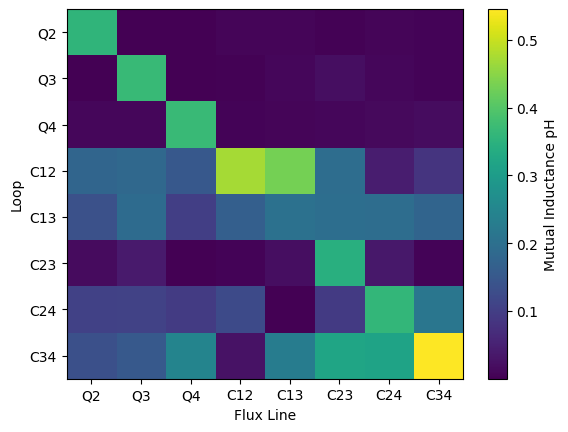

In [5]:
plt.imshow(np.abs(crosstalk_matrix), interpolation='none', aspect='auto')

plt.colorbar(label='Mutual Inductance pH')

plt.xlabel('Flux Line')
plt.ylabel('Loop')

labels = ['Q2', 'Q3', 'Q4', 'C12', 'C13', 'C23', 'C24', 'C34']

plt.xticks(range(8), labels)
plt.yticks(range(8), labels)

plt.show()

In [8]:
eigenvalues, eigenvectors= np.linalg.eig(crosstalk_matrix)
eigenvalues

array([0.8268647 +0.j        , 0.05443395+0.j        ,
       0.10310653+0.j        , 0.56868668+0.j        ,
       0.34441643+0.j        , 0.35481585+0.j        ,
       0.38413317+0.00457708j, 0.38413317-0.00457708j])

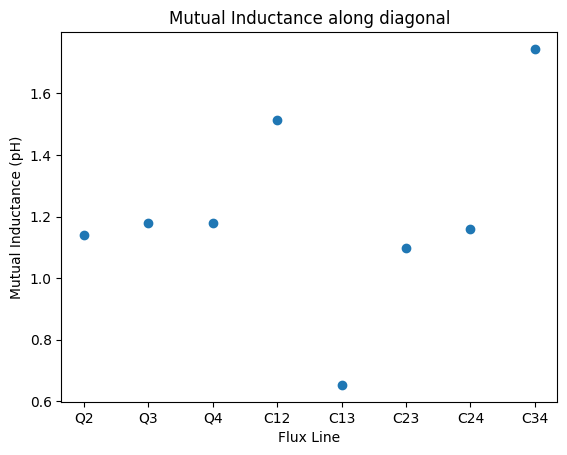

[0.35650624 0.36845984 0.36859565 0.47267534 0.20408163 0.34309634
 0.36196658 0.54520885]


In [790]:
plt.plot(np.abs(np.diag(crosstalk_matrix*3.2)), linestyle='', marker='o')

plt.xlabel('Flux Line')
plt.ylabel('Mutual Inductance (pH)')

labels = ['Q2', 'Q3', 'Q4', 'C12', 'C13', 'C23', 'C24', 'C34']
plt.xticks(range(8), labels)

plt.title('Mutual Inductance along diagonal')
plt.show()

print(np.abs(np.diag(crosstalk_matrix)))


In [721]:
print(np.dot(crosstalk_inverse_matrix, crosstalk_matrix))

[[ 1.00000000e+00 -2.48577614e-18  7.77104492e-18  1.62619401e-17
   1.59685860e-17 -9.09074172e-18 -8.88761947e-18 -3.21330948e-19]
 [-2.24915869e-17  1.00000000e+00 -4.29001018e-18 -2.19555663e-17
  -1.95139854e-17  4.43767060e-17  8.21521226e-17  7.40159736e-17]
 [ 6.40350296e-18 -9.78219530e-18  1.00000000e+00 -3.44819123e-17
  -7.34433222e-17  1.39274508e-17  1.16274420e-17  3.78192199e-17]
 [ 3.75372917e-16  3.94748882e-16  8.35759918e-16  1.00000000e+00
  -1.03782157e-15 -6.94661916e-16 -2.44224029e-16  1.15493052e-15]
 [-5.23643592e-16  7.79260351e-16 -1.04225067e-15  1.57315132e-16
   1.00000000e+00  2.00663577e-16  2.26588451e-16  3.63630704e-16]
 [-1.62834722e-16  7.09025717e-17 -1.07570524e-17  6.50433803e-17
   2.80674490e-17  1.00000000e+00 -1.07246057e-16 -8.65731216e-17]
 [-9.10913678e-16  1.75789984e-15  6.24322610e-16  4.52585894e-16
  -6.58994673e-16  5.70864810e-16  1.00000000e+00 -3.19772263e-16]
 [-9.07056318e-16 -6.68149657e-16 -3.11334768e-16 -2.51689662e-16
   

# 2. Flux to voltage optimization

### 2.1 Define flux to voltage function

In [722]:
def flux_to_voltage(fluxes):
    '''
    Turns flux vector into voltage vector
    '''
    return np.dot(crosstalk_inverse_matrix, fluxes) + crosstalk_voltage_offset_vector

In [834]:
def voltage_to_flux(voltages):
    return np.dot(crosstalk_matrix, voltages) - crosstalk_offset_vector

In [723]:
fluxes = [0, 0, 0, 0, 0, 0, 0, 0]

print(flux_to_voltage(fluxes))

[  0.56073154  -0.98343006   1.33376405  18.00564323 -17.9121136
   1.35702426  14.73988526 -15.72647232]


### 2.2 Plot sum of voltages

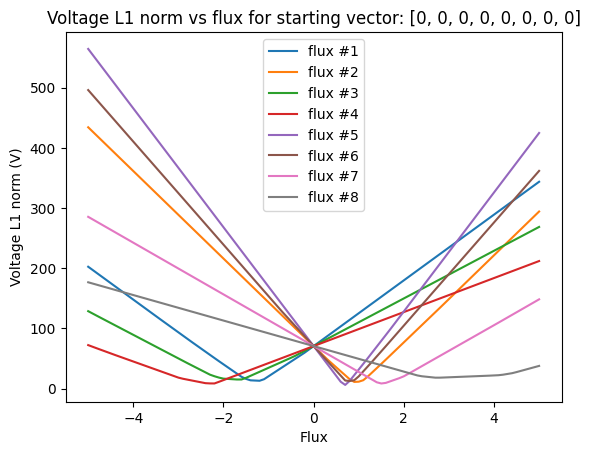

In [724]:
### for each flux channel, plot L1 norm of voltage vector with all other fluxes at 0

flux_values = np.linspace(-5, 5, 101)
initial_fluxes = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range(8):
    fluxes = np.zeros(len(initial_fluxes), dtype='float')
    fluxes[:] = initial_fluxes[:]
#     fluxes = [0, 0, 0, 0, 0, 0, 0, 0]
    voltage_norms = []
    for flux_value in flux_values:
        fluxes[i] = flux_value
        voltage_norms.append(np.linalg.norm(flux_to_voltage(fluxes), ord=1))
        
    plt.plot(flux_values, voltage_norms, label=f'flux #{i+1}')
    
plt.xlabel('Flux')
plt.ylabel('Voltage L1 norm (V)')

plt.legend()

plt.title(f'Voltage L1 norm vs flux for starting vector: {initial_fluxes}')

plt.show()

[0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1]


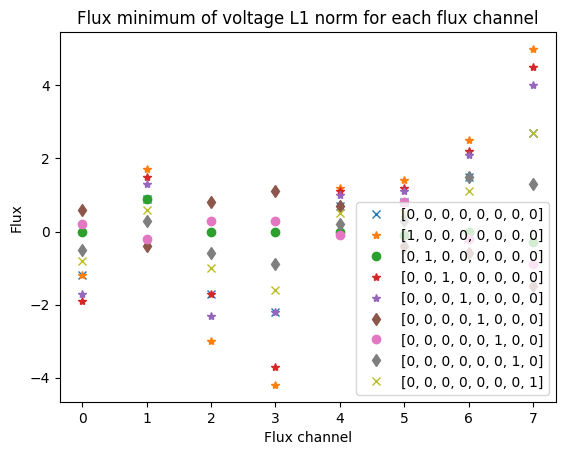

In [725]:
### for each flux channel, find minimum of L1 norm of voltage vector with all other fluxes at some value
### repeat this for difference initial flux values

# create list of initial fluxes
initial_fluxes_list = []
initial_fluxes_list.append([0, 0, 0, 0, 0, 0, 0, 0])
for i in range(8):
    fluxes = [0, 0, 0, 0, 0, 0, 0, 0]
    fluxes[i] = 1
    initial_fluxes_list.append(fluxes)

for initial_fluxes in initial_fluxes_list:

    print(initial_fluxes)
    flux_minima = []
    flux_values = np.linspace(-5, 5, 101)
    for i in range(len(initial_fluxes)):
        fluxes = np.zeros(len(initial_fluxes), dtype='float')
        fluxes[:] = initial_fluxes[:]
    #     fluxes = [0, 0, 0, 0, 0, 0, 0, 0]
        voltage_norms = []
        for flux_value in flux_values:
            fluxes[i] = flux_value
            voltage_norms.append(np.linalg.norm(flux_to_voltage(fluxes), ord=1))

        flux_minimum = flux_values[np.argmin(voltage_norms)]
        flux_minima.append(flux_minimum)

    flux_minima = np.array(flux_minima)
    marker = 'o'
    if any(np.abs(flux_minima) > 1):
        marker = 'd'
    if any(np.abs(flux_minima) > 2):
        marker = 'x'
    if any(np.abs(flux_minima) > 3):
        marker = '*'
    plt.plot(flux_minima, linestyle='', marker=marker, label=initial_fluxes)
    
plt.ylabel('Flux')
plt.xlabel('Flux channel')

plt.legend()

plt.title(f'Flux minimum of voltage L1 norm for each flux channel')

plt.show()

### 2.3 Brute Force optimization

In [9]:
### try each combination of each flux line channel having +/- m flux quanta

initial_fluxes = [0, 0, 0, 0, 0, 0, 0, 0]

# up to +/- flux_range for each channel
flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]

minimum_voltage_norm = np.inf
minimum_voltage_fluxes = initial_fluxes
for combination in product(*[range(-flux_range, flux_range+1) for flux_range in flux_ranges]):
    fluxes = np.array(initial_fluxes) + np.array(combination)
    
    voltages = flux_to_voltage(fluxes)
    
    voltage_norm = np.linalg.norm(voltages, ord=1)

    if voltage_norm < minimum_voltage_norm:
        minimum_voltage_norm = voltage_norm
        minimum_voltage_fluxes = fluxes
        
print(minimum_voltage_fluxes)
print(minimum_voltage_norm)

voltages = flux_to_voltage(minimum_voltage_fluxes)
print(voltages)

[ 0  0  0  2  1  0  0 -1]
4.819268622708963
[ 0.33778682 -0.27735776 -0.06358326  0.44522065  2.80153106  0.6018513
  0.15569734 -0.13624042]


In [10]:
3**8

6561

In [703]:
def brute_force_get_combination(initial_fluxes, flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]):

    # up to +/- flux_range for each channel
    minimum_voltage_norm = np.inf
    minimum_voltages = None
    minimum_voltage_fluxes = None
    minimum_voltage_combination = None
    
    for combination in product(*[range(-flux_range, flux_range+1) for flux_range in flux_ranges]):
        fluxes = np.array(initial_fluxes) + np.array(combination)
        
        voltages = flux_to_voltage(fluxes)

        voltage_norm = np.linalg.norm(voltages, ord=1)
        
#         if voltage_norm < 15:
#             print(voltage_norm)
        
        if voltage_norm < minimum_voltage_norm:
            minimum_voltage_norm = voltage_norm
            minimum_voltages = voltages
            minimum_voltage_fluxes = fluxes
            minimum_voltage_combination = combination
            
#     print(minimum_voltages)
#     print(minimum_voltage_norm)
#     print(minimum_voltage_combination)
#     print(minimum_voltage_fluxes)

    return np.array(minimum_voltage_combination)

In [704]:
def brute_force(initial_fluxes, flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]):
    brute_force_fluxes = initial_fluxes + brute_force_get_combination(initial_fluxes, flux_ranges)
    return flux_to_voltage(brute_force_fluxes)

In [406]:
initial_fluxes = np.array([0, 0.2, 0.5, 0.4, 0, 0, 0.1, 0])
initial_fluxes = np.array([0]*8)
initial_fluxes = np.array([-0.183,  0.537, -0.317,  0.425,  0.416, -0.477,  0.347, -1.437])


flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]
brute_force_combination = brute_force_get_combination(initial_fluxes, flux_ranges=flux_ranges)
brute_force_optimized_fluxes = initial_fluxes + brute_force_combination

In [407]:
print(brute_force_optimized_fluxes)
brute_force_voltages = flux_to_voltage(brute_force_optimized_fluxes)

[-0.183  0.537 -1.317  0.425  0.416 -0.477  0.347 -1.437]


In [14]:
brute_force_voltages = brute_force(initial_fluxes, flux_ranges=flux_ranges)

In [15]:
%timeit brute_force_voltages = brute_force(initial_fluxes, flux_ranges=flux_ranges)

15.2 s ± 572 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [408]:
print(brute_force_voltages)
print(np.linalg.norm(brute_force_voltages, ord=1))

[ 0.08180377  0.85569877 -3.01692547 -0.00383916 -0.1945564  -0.25235597
 -0.46003104 -0.81469478]
5.6799053650524645


In [17]:
[ 0.33778682 -0.27735776 -0.06358326  0.44522065  2.80153106  0.6018513
  0.15569734 -0.13624042]
4.819268622708964

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1265136445.py, line 1)

### 2.4 Check threshold
Don't need to find the absolute minimum, just get it below the threshold

In [705]:
def brute_force_threshold_get_combination(initial_fluxes, flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1], threshold=10):

    # up to +/- flux_range for each channel
    for combination in product(*[range(-flux_range, flux_range+1) for flux_range in flux_ranges]):
        fluxes = np.array(initial_fluxes) + np.array(combination)

        voltages = flux_to_voltage(fluxes)

        voltage_norm = np.linalg.norm(voltages, ord=1)
        
#         if voltage_norm < 28:
#             print(combination)
#             print(fluxes)
#             print(voltages)
#             print(voltage_norm)

        if voltage_norm < threshold:
#             print('\n'*5)
            return np.array(combination)

    print(f'combination below threshold not found')
    return None

In [706]:
def brute_force_threshold(initial_fluxes, flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1], threshold=10):

    combination = brute_force_threshold_get_combination(initial_fluxes, flux_ranges=flux_ranges, threshold=threshold)
    
    if combination is not None:
        fluxes = np.array(initial_fluxes) + np.array(combination)
        voltages = flux_to_voltage(fluxes)

        return voltages
    else:
        return None

In [19]:
initial_fluxes = [0, 0.2, 0, 0.4, 0, 0, 0.1, 0]
flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]
threshold = 10
voltages = brute_force_threshold(initial_fluxes, flux_ranges=flux_ranges, threshold=threshold)

In [20]:
%timeit brute_force_threshold(initial_fluxes, flux_ranges=flux_ranges, threshold=threshold)

5.24 s ± 149 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
print(voltages)
print(np.linalg.norm(voltages, ord=1))

[-2.48448856 -2.50887249  0.13027688  1.09984038 -0.88390851  0.03637163
 -1.90388364 -0.54214689]
9.58978898402976


### 2.5 Update voltage vector
Rather than recalculating the voltage vector by matrix multiplication for each combination, see how change the flux by one quantum changes the voltages

In [22]:
def brute_force_update(initial_fluxes, flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]):
    # up to +/- flux_range for each channel
    minimum_voltage_norm = np.inf
    minimum_voltages = None
    minimum_voltage_fluxes = None
    minimum_voltage_combination = None
    
    previous_combination = -np.array(flux_ranges)
    previous_voltages = flux_to_voltage(np.array(initial_fluxes) + np.array(previous_combination))
    
    i = 0
    
    for combination in product(*[range(-flux_range, flux_range+1) for flux_range in flux_ranges]):
        fluxes = np.array(initial_fluxes) + np.array(combination)
        
        difference = np.array(combination) - previous_combination
        if any(difference != 0):

            non_zero_indices = np.nonzero(difference)
            
            new_voltages = previous_voltages
            
#             print(previous_voltages)
#             print(np.sum(difference[non_zero_indices]*crosstalk_inverse_matrix[:,non_zero_indices], 2))
#             print(np.sum(difference[non_zero_indices]*crosstalk_inverse_matrix[:,non_zero_indices], 2).shape)
            
#             print(np.sum((difference[non_zero_indices]*crosstalk_inverse_matrix[:,non_zero_indices]), 2).shape)
            new_voltages = previous_voltages + np.sum(difference[non_zero_indices]*crosstalk_inverse_matrix[:,non_zero_indices], (1, 2))
        else:
            new_voltages = previous_voltages
            
        
                    
        voltage_norm = np.linalg.norm(new_voltages, ord=1)
        
        if voltage_norm < minimum_voltage_norm:
            minimum_voltage_norm = voltage_norm
            minimum_voltages = voltages
            minimum_voltage_fluxes = fluxes
            minimum_voltage_combination = combination
            
        previous_combination = combination
        previous_voltages = new_voltages
        
#         if i == 1000:
#             return
#         i += 1
        
    return np.array(minimum_voltage_combination)

In [23]:
initial_fluxes = [0, 0.2, 0, 0.4, 0, 0, 0.1, 0]
flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]
threshold = 10
brute_force_update_combination = brute_force_update(initial_fluxes, flux_ranges=flux_ranges)

In [24]:
%timeit brute_force_update(initial_fluxes, flux_ranges=flux_ranges)

46.4 s ± 825 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
brute_force_voltages = flux_to_voltage(initial_fluxes + brute_force_update_combination)
print(brute_force_voltages)
print(np.linalg.norm(brute_force_voltages, ord=1))

[ 0.25816839  0.16901285 -0.16883813  0.10788372  1.54108116  0.86667276
  2.83837336 -0.0917267 ]
6.041757062999128


### 2.6 Scipy minimize
Doesn't work well because we can't constrain the results to integer number of flux quanta. We can still optimize and round to nearest integer at the end but it does not give the same result as brute force

In [707]:
def cost_function(fluxes):
    return np.linalg.norm(voltages, ord=1)

In [708]:
def scipy_minimize(initial_fluxes, flux_ranges=None, initial_guess=None):
    
    if flux_ranges is None:
        flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]
        
    if initial_guess is None:
        initial_guess = [0]*len(flux_ranges)
    
    def cost_function(*fluxes):
        
        # round to int
#         fluxes = np.copy(np.round(fluxes)).astype(int)
        fluxes = np.reshape(fluxes, len(flux_ranges))
        voltages = flux_to_voltage(fluxes + initial_fluxes)
        
        cost = np.linalg.norm(voltages, ord=1)*1e5
        return cost
    
    bounds = []
    for i in range(len(flux_ranges)):
        bounds.append((-flux_ranges[i], flux_ranges[i]))
        
#     result = minimize(cost_function, x0=initial_guess, bounds=bounds, callback=lambda x: print(cost_function(x)))
    result = minimize(cost_function, x0=initial_guess, bounds=bounds)
    
    print(result)
    
    result_voltages = flux_to_voltage(initial_fluxes + np.round(result.x))
    return result_voltages
        
        
    

In [28]:
initial_fluxes = [0, 0.2, 0.5, 0.4, 0, 0, 0.1, 0]
flux_ranges = [5]*8
# flux_ranges=[3, 2, 1, 3, 4, 4, 2, 1]
voltages = scipy_minimize(initial_fluxes, flux_ranges=flux_ranges, initial_guess=brute_force_combination)

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 124616.3380131351
        x: [-9.399e-02  3.295e-01 -5.283e-01 -1.563e-01  1.602e-01
            -2.018e-01  7.256e-02 -4.103e-01]
      nit: 56
      jac: [ 1.227e+06  2.712e+05  1.454e+05  1.214e+06  2.141e+05
             6.627e+04  2.096e+05  1.125e+05]
     nfev: 3915
     njev: 435
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>


In [29]:
print(brute_force_combination)
print(brute_force_combination + initial_fluxes)
print(flux_to_voltage(brute_force_combination + initial_fluxes))
print(np.linalg.norm(flux_to_voltage(brute_force_combination + initial_fluxes), ord=1))

[ 0  0 -1 -1  0  0  0 -1]
[ 0.   0.2 -0.5 -0.6  0.   0.   0.1 -1. ]
[ 0.24922559  0.16083782 -1.31795931 -0.76532247 -1.04657374  0.46796954
  0.1942016  -1.2135165 ]
5.4156065563748434


In [30]:
x = np.array([-9.399e-02,  3.295e-01, -5.283e-01, -1.563e-01,  1.602e-01,
            -2.018e-01,  7.256e-02, -4.103e-01])

In [31]:
print(x + initial_fluxes)
print(flux_to_voltage(x + initial_fluxes))
print(np.linalg.norm(flux_to_voltage(x + initial_fluxes), ord=1))

print()
print(np.round(x) + initial_fluxes)
print(flux_to_voltage(np.round(x) + initial_fluxes))
print(np.linalg.norm(flux_to_voltage(np.round(x) + initial_fluxes), ord=1))

[-0.09399  0.5295  -0.0283   0.2437   0.1602  -0.2018   0.17256 -0.4103 ]
[ 1.16500320e-03  1.04731266e+00 -1.16703521e-01  6.28755591e-04
 -3.84632391e-02 -1.12646322e-04  4.09435458e-02  2.05781992e-03]
1.247387194155467

[ 0.   0.2 -0.5  0.4  0.   0.   0.1  0. ]
[ 0.26637353  0.11885523 -1.28359312  2.81551585 -2.82287981  0.38902805
  1.23110037 -0.87296714]
9.800313109343154


In [32]:
print(voltages)
print(np.linalg.norm(voltages, ord=1))

[ 0.26637353  0.11885523 -1.28359312  2.81551585 -2.82287981  0.38902805
  1.23110037 -0.87296714]
9.800313109343154


In [33]:
print(np.dot(crosstalk_matrix, voltages) - crosstalk_offset_vector)

[ 0.00000000e+00  2.00000000e-01 -5.00000000e-01  4.00000000e-01
  3.88578059e-16 -5.55111512e-17  1.00000000e-01 -6.66133815e-16]


### 2.7 Only optimize for subset of channels
We mostly care about flux values of 2 channels, we can assume the others don't change by much (maybe add a check to see if they change by more than (half) a flux quantum)

In [709]:
def brute_force_subset(initial_fluxes, channels_to_optimize, flux_ranges=None, limit_flux_change=None):
    '''
    Does brute force search only on specified channels. 
    
    '''
    
    
    if flux_ranges is None:
        flux_ranges = [3]*len(channels_to_optimize)


    crosstalk_matrix_subspace = np.copy(crosstalk_matrix[channels_to_optimize, :][:, channels_to_optimize])
    crosstalk_inverse_matrix_subspace = np.linalg.inv(crosstalk_matrix_subspace)

    crosstalk_offset_vector_subspace = crosstalk_offset_vector[channels_to_optimize]
    
    def flux_to_voltage_subset(fluxes):
        return np.dot(crosstalk_inverse_matrix_subspace, (fluxes + crosstalk_offset_vector_subspace))
    
    initial_fluxes_subset = np.array(initial_fluxes)[channels_to_optimize]
    
    initial_voltages = flux_to_voltage(initial_fluxes)
    
    # up to +/- flux_range for each channel
    minimum_voltage_norm = np.inf
    minimum_voltages = None
    minimum_voltage_fluxes = None
    minimum_voltage_combination = None
    
    for combination in product(*[range(-flux_range, flux_range+1) for flux_range in flux_ranges]):
        # only update fluxes of the channels we want to optimize
        fluxes_subset = np.array(initial_fluxes_subset) + np.array(combination)
        
        fluxes = np.copy(initial_fluxes)
        fluxes[channels_to_optimize] = fluxes_subset
        
        print(fluxes)
        
#         voltages = np.copy(initial_voltages)
        
        voltages = flux_to_voltage(fluxes)
        
        
        voltage_norm = np.linalg.norm(voltages, ord=1)
        
        if voltage_norm < minimum_voltage_norm:
            minimum_voltage_norm = voltage_norm
            minimum_voltages = voltages
            minimum_voltage_fluxes = fluxes
            minimum_voltage_combination = combination

    print(minimum_voltage_fluxes)        
    
    return np.array(minimum_voltages)



In [35]:
initial_fluxes = brute_force_optimized_fluxes
channels_to_optimize = [0, 3]
flux_ranges = [5, 5]
brute_force_subset_voltages = brute_force_subset(initial_fluxes, channels_to_optimize, flux_ranges=flux_ranges)
print(brute_force_subset_voltages_subset)

[-5.   0.2 -0.5 -5.6  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5 -4.6  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5 -3.6  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5 -2.6  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5 -1.6  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5 -0.6  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5  0.4  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5  1.4  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5  2.4  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5  3.4  0.   0.   0.1 -1. ]
[-5.   0.2 -0.5  4.4  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5 -5.6  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5 -4.6  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5 -3.6  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5 -2.6  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5 -1.6  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5 -0.6  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5  0.4  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5  1.4  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5  2.4  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5  3.4  0.   0.   0.1 -1. ]
[-4.   0.2 -0.5  4.4  0.   0.   0.1 -1. ]
[-3.   0.2 -0.5 -5.6  0.   0.   0.1 -1. ]
[-3.   0.2 -0.5 -4.6  0.   0.   0.

NameError: name 'brute_force_subset_voltages_subset' is not defined

In [36]:
# brute_force_subset_voltages = np.copy(brute_force_voltages)
# brute_force_subset_voltages[channels_to_optimize] = brute_force_subset_voltages_subset

print('brute force:')
print(brute_force_voltages)
print(np.linalg.norm(brute_force_voltages, ord=1))
print(np.dot(crosstalk_matrix, brute_force_voltages) - crosstalk_offset_vector)
print()

print('brute force subset:')
print(brute_force_subset_voltages)
print(np.linalg.norm(brute_force_subset_voltages, ord=1))
print(np.dot(crosstalk_matrix, brute_force_subset_voltages) - crosstalk_offset_vector)

brute force:
[ 0.25816839  0.16901285 -0.16883813  0.10788372  1.54108116  0.86667276
  2.83837336 -0.0917267 ]
6.041757062999128
[ 0.00000000e+00  2.00000000e-01 -7.76288755e-17  1.40000000e+00
  1.11022302e-16  2.77555756e-17  1.10000000e+00 -3.88578059e-16]

brute force subset:
[ 0.24922559  0.16083782 -1.31795931 -0.76532247 -1.04657374  0.46796954
  0.1942016  -1.2135165 ]
5.4156065563748434
[-1.38777878e-17  2.00000000e-01 -5.00000000e-01 -6.00000000e-01
  3.33066907e-16  2.77555756e-17  1.00000000e-01 -1.00000000e+00]


### 2.8 Brute Force better order
Instead of starting at the extremes of the list of combos, i.e. [-3, -3, -3, ...], start at [0, 0, 0, ...] and work our way up changing +/- 1 flux on each channel, then +/- 2 on each, etc.

In [710]:
def brute_force_threshold_better_order_get_combination(initial_fluxes, flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1], threshold=8, single_channel_threshold=4):

    
    
    # up to +/- flux_range for each channel
    
    
    # list of (index, up, (combo)) pairs, where index describes the last index change to get combo, up is a boolean that's true
    # if the combo was generated by increasing the value at index (instead of descreasing). These are necessary to prevent
    # duplicate combos
    
    initial_combo = tuple([0]*len(flux_ranges))
    index_combo_pairs = [(0, True, initial_combo)]
    
    counter = 0
    while(len(index_combo_pairs)) > 0:
        index, up, combo = index_combo_pairs.pop(0)
        
#         print(index, up, combo)
        
        fluxes = np.array(initial_fluxes) + np.array(combo)

        voltages = flux_to_voltage(fluxes)

        voltage_norm = np.linalg.norm(voltages, ord=1)
        

        if voltage_norm <= threshold and all(voltages < single_channel_threshold):
#             print('\n'*5)
            print(counter)
            return np.array(combo)
        
        # add every possible next combo
        
        
        # include all combinations with values to the right of index changed
        for i in range(index + 1, len(combo)):
            new_combo = list(combo)
            new_combo[i] += 1
            if new_combo[i] <= flux_ranges[i]:
                index_combo_pairs.append((i, True, tuple(new_combo)))
                
            new_combo = list(combo)
            new_combo[i] -= 1
            if new_combo[i] >= -flux_ranges[i]:
                index_combo_pairs.append((i, False, tuple(new_combo)))

        # only include the combination with the value at index changed in the same direction as it was generated in
        # i.e. if up is true for this combo, then incldue the combo where the value at index is incremented
        # otherwise, include the combo where the value at index is decremented
        # if initial combo (i.e. all zeros combo), include both the increment and decrement on index 0
        if combo == initial_combo:
            new_combo = list(combo)
            new_combo[index] += 1
            if new_combo[index] <= flux_ranges[index]:
                index_combo_pairs.append((index, True, tuple(new_combo)))
                
            new_combo = list(combo)
            new_combo[index] -= 1
            if new_combo[index] >= -flux_ranges[index]:
                index_combo_pairs.append((index, False, tuple(new_combo)))
        else:
            if up:
                new_combo = list(combo)
                new_combo[index] += 1
                if new_combo[index] <= flux_ranges[index]:
                    index_combo_pairs.append((index, True, tuple(new_combo)))
            else:
                new_combo = list(combo)
                new_combo[index] -= 1
                if new_combo[index] >= -flux_ranges[index]:
                    index_combo_pairs.append((index, False, tuple(new_combo)))

#         print(counter)
        counter += 1
        
        

    print(f'combination below threshold not found')
    print(counter)
    return None

In [711]:
6561

6561

In [712]:
def brute_force_threshold_better_order(initial_fluxes, flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1], threshold=8):
    brute_force_fluxes = initial_fluxes + brute_force_threshold_better_order_get_combination(initial_fluxes, flux_ranges)
    return flux_to_voltage(brute_force_fluxes)

In [257]:
initial_fluxes = np.array([0, 0.2, 0.5, 0.4, 0.4, 0.3, -0.4, 0.4])
initial_fluxes = np.array([0]*8)
threshold = 7

flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]
# flux_ranges = [1, 1, 1, 1, 1, 1, 1, 1]
print(np.product(np.array(flux_ranges)*2+1))

brute_force_threshold_better_order_combination = brute_force_threshold_better_order_get_combination(initial_fluxes, flux_ranges=flux_ranges, threshold=threshold)
print(brute_force_threshold_better_order_combination)
brute_force_threshold_better_order_optimized_fluxes = initial_fluxes + brute_force_threshold_better_order_combination
print(brute_force_threshold_better_order_optimized_fluxes)
brute_force_threshold_better_order_voltages = flux_to_voltage(initial_fluxes + brute_force_threshold_better_order_combination)
print(brute_force_threshold_better_order_voltages)
print(np.linalg.norm(brute_force_threshold_better_order_voltages, ord=1))

893025


KeyboardInterrupt: 

In [224]:
brute_force_threshold_better_order_optimized_fluxes = initial_fluxes + brute_force_threshold_better_order_combination
print(brute_force_threshold_better_order_optimized_fluxes)
brute_force_threshold_better_order_voltages = flux_to_voltage(brute_force_threshold_better_order_optimized_fluxes)
print(brute_force_threshold_better_order_voltages)
brute_force_threshold_better_order_voltage_norm = np.linalg.norm(brute_force_threshold_better_order_voltages, 1)
print(f'norm is {brute_force_threshold_better_order_voltage_norm}')

[ 0.   0.2 -0.5  0.4  0.4 -0.7 -0.4  0.4]
[ 0.60534058 -0.10706111 -0.77005457  1.50784197 -0.19193284 -1.32633428
 -1.76085144  1.56797053]
norm is 7.837387324317121


### 2.9 Integer Programming

In [714]:
def integer_programming_get_combination_old(initial_fluxes, single_channel_threshold=4):
    # Create the problem instance
    problem = pulp.LpProblem('Minimize_L1_Norm', pulp.LpMinimize)

    # Define decision variables (integer adjustments)
    d_vars = [pulp.LpVariable(f"d_{i}", lowBound=-3, upBound=3, cat='Integer') for i in range(len(initial_fluxes))]

    # Calculate the voltage vector after transformation
    voltage_vector = flux_to_voltage(initial_fluxes + np.array(d_vars))


    # Define auxiliary variables for absolute values
    abs_vars = [pulp.LpVariable(f"abs_{i}", lowBound=0) for i in range(len(voltage_vector))]

    # Add constraints to ensure abs_vars[i] >= voltage_vector[i] and abs_vars[i] >= -voltage_vector[i]
    for i in range(len(voltage_vector)):
        problem += abs_vars[i] >= voltage_vector[i]
        problem += abs_vars[i] >= -voltage_vector[i]
        # Add constraints to ensure abs_vars[i] <= single_channel_threshold
        problem += abs_vars[i] <= single_channel_threshold

    # Objective function: Minimize the sum of absolute values (L1 norm)
    l1_norm = pulp.lpSum(abs_vars)
    problem += l1_norm

    # Solve the problem
    problem.solve()

    # Extract the optimal adjustments
    optimal_adjustments = [pulp.value(d_var) for d_var in d_vars]
    
    return np.array(optimal_adjustments)


In [793]:
def integer_programming_get_combination(initial_fluxes, single_channel_threshold=4, fixed_indices=[]):
    # Create the problem instance
    problem = pulp.LpProblem('Minimize_L1_Norm', pulp.LpMinimize)

    # Define decision variables (integer adjustments)
#     d_vars = [pulp.LpVariable(f"d_{i}", lowBound=-3, upBound=3, cat='Integer') for i in range(len(initial_fluxes))]
    
    d_vars = []
    
    for i in range(len(initial_fluxes)):
        if i in fixed_indices:
            d_vars.append(0)
        else:
            d_vars.append(pulp.LpVariable(f"d_{i}", lowBound=-5, upBound=5, cat='Integer'))

    # Apply constraints to fix certain indices
#     for idx in fixed_indices:
#         problem += d_vars[idx] == 0
        
#     print(fixed_indices)
    
    # Calculate the voltage vector after transformation
    voltage_vector = flux_to_voltage(initial_fluxes + np.array(d_vars))


    # Define auxiliary variables for absolute values
    abs_vars = [pulp.LpVariable(f"abs_{i}", lowBound=0) for i in range(len(voltage_vector))]

    # Add constraints to ensure abs_vars[i] >= voltage_vector[i] and abs_vars[i] >= -voltage_vector[i]
    for i in range(len(voltage_vector)):
        problem += abs_vars[i] >= voltage_vector[i]
        problem += abs_vars[i] >= -voltage_vector[i]
        # Add constraints to ensure abs_vars[i] <= single_channel_threshold
        problem += abs_vars[i] <= single_channel_threshold

    # Objective function: Minimize the sum of absolute values (L1 norm)
    l1_norm = pulp.lpSum(abs_vars)
    problem += l1_norm

    # Solve the problem
    problem.solve()

    # Extract the optimal adjustments
    optimal_adjustments = [pulp.value(d_var) for d_var in d_vars]
    
    return np.array(optimal_adjustments)


In [716]:
def integer_programming(initial_fluxes, single_channel_threshold=4):
    optimal_adjustments = integer_programming_get_combination(initial_fluxes, single_channel_threshold=single_channel_threshold)
    optimal_fluxes = initial_fluxes + optimal_adjustments
    voltages = flux_to_voltage(optimal_fluxes)
    return voltages

In [761]:
def integer_programming_get_combination_gurobi(initial_fluxes, single_channel_threshold=4, fixed_indices=[]):
    # Create the Gurobi model
    model = gp.Model('Minimize_L1_Norm')

    # Define decision variables (integer adjustments)
    d_vars = [0] * len(initial_fluxes)
    for i in range(len(initial_fluxes)):
        if not i in fixed_indices:
            d_vars[i] = model.addVar(vtype=GRB.INTEGER, lb=-5, ub=5, name=f"d_{i}")

    # Update the model to integrate new variables
    model.update()

    # Calculate the voltage vector after transformation
    adjusted_fluxes = np.copy(initial_fluxes)
    for d in d_vars:
        adjusted_fluxes[i] += d
#     adjusted_fluxes = initial_fluxes + np.array([d if d == 0 else d.x for d in d_vars])
    voltage_vector = flux_to_voltage(adjusted_fluxes)

    # Define auxiliary variables for absolute values
    abs_vars = [model.addVar(lb=0, name=f"abs_{i}") for i in range(len(voltage_vector))]
    
    

    # Add constraints to ensure abs_vars[i] >= voltage_vector[i] and abs_vars[i] >= -voltage_vector[i]
    for i in range(len(voltage_vector)):
        model.addConstr(abs_vars[i] == abs_(d_vars[i]))
        # Add constraints to ensure abs_vars[i] <= single_channel_threshold
        model.addConstr(abs_vars[i] <= single_channel_threshold)

    # Objective function: Minimize the sum of absolute values (L1 norm)
    l1_norm = gp.quicksum(abs_vars)
    model.setObjective(l1_norm, GRB.MINIMIZE)

    # Optimize the model
    model.optimize()

    # Extract the optimal adjustments
    optimal_adjustments = [initial_fluxes[i] if i in fixed_indices else d.x for i, d in enumerate(d_vars)]
    
    return np.array(optimal_adjustments)

In [867]:
initial_fluxes = np.array([0, 0.2, 0.5, 0.4, 0.4, 0.3, -0.4, 0.4])
initial_fluxes = np.array([-0.183,  0.537, -0.317,  0.425,  0.416, -0.477,  0.347, -1.437])
initial_fluxes = np.array([ 0.33539824,  0.44168237,  0.        ,  0.47488628,  0.50077902, 0.60582416,  0.36138734, -0.015     ])
initial_fluxes = np.array([ 0.5,   0.5,   0.,    0.5,   0.5,   0.5,   0.5,   0.18])

initial_fluxes = np.array([ 0.5,   0,   0,    0.5,   0.5,   0,   0.5,   0.5])
threshold = 8
single_channel_threshold = 2

flux_ranges = [3, 2, 1, 3, 4, 4, 2, 1]

fixed_indices = [2, 3, 4]
fixed_indices = [2, 7]
# integer_programming_optimal_adjustments = integer_programming_get_combination(initial_fluxes, single_channel_threshold=single_channel_threshold, fixed_indices=fixed_indices)
# integer_programming_optimal_adjustments = integer_programming_get_combination_gurobi(initial_fluxes, single_channel_threshold=single_channel_threshold, fixed_indices=fixed_indices)
integer_programming_optimal_adjustments = integer_programming_get_combination(initial_fluxes, single_channel_threshold=single_channel_threshold)
print("Optimal Adjustments:", integer_programming_optimal_adjustments)
    
integer_programming_optimal_fluxes = initial_fluxes + integer_programming_optimal_adjustments
integer_programming_voltages = flux_to_voltage(integer_programming_optimal_fluxes)
print(integer_programming_voltages)
print(np.linalg.norm(integer_programming_voltages, ord=1))
integer_programming_voltages

Optimal Adjustments: [ 0.  0.  0. -1.  0.  0.  0.  0.]
[ 1.95304891 -0.5992596   0.47119229 -0.75946584 -0.00928181  0.9148073
 -0.07055684  1.49634344]
6.273956024854602


array([ 1.95304891, -0.5992596 ,  0.47119229, -0.75946584, -0.00928181,
        0.9148073 , -0.07055684,  1.49634344])

# 3. Simulate Sweeps
Sweep flux on different channels and see how voltages respond with different methods

### 3.1 Sweep no optimization

In [211]:
initial_fluxes = [0, 0.2, 0.5, 0.4, 0, 0, 0.1, 0]
initial_fluxes = [0, 0, 0, 0, 0, 0, 0, 0]
initial_fluxes = [0.5]*8

# brute force initial fluxes
brute_force_combination = brute_force_get_combination(initial_fluxes)
print(f'optimized combination: {brute_force_combination}')
initial_fluxes += brute_force_combination
print(f'optimized fluxes: {brute_force_combination}')

initial_voltages = flux_to_voltage(initial_fluxes)
print(f'setting initial voltages to {initial_voltages}')
print(f'norm is {np.round(np.linalg.norm(initial_voltages, 1), 3)}')


optimized combination: [-1  0  0  0 -1  0  0 -1]
optimized fluxes: [-1  0  0  0 -1  0  0 -1]
setting initial voltages to [-1.1406779   1.05009857  1.20548831 -0.06037978 -0.56350014  2.05784662
  0.02284369  0.66935677]
norm is 2.977


In [212]:
print(initial_fluxes)

[-0.5  0.5  0.5  0.5 -0.5  0.5  0.5 -0.5]


In [220]:
fluxes = np.copy(initial_fluxes).astype(float)
channel_to_sweep = 7
flux_sweep = np.linspace(0.5, 1, 11)

voltage_data = np.zeros((len(flux_sweep), len(initial_fluxes)))

for i in range(len(flux_sweep)):
    fluxes[channel_to_sweep] = flux_sweep[i] + brute_force_combination[channel_to_sweep]
    print(f'targeting flux: {fluxes}')
    
    voltages = flux_to_voltage(fluxes)
    
    print(f'setting voltages to {voltages}')
    print(f'norm is {np.round(np.linalg.norm(voltages, 1), 2)}')
    print()
    
    voltage_data[i,:] = voltages

targeting flux: [-0.5  0.5  0.5  0.5 -0.5  0.5  0.5 -0.5]
setting voltages to [-1.1406779   1.05009857  1.20548831 -0.06037978 -0.56350014  2.05784662
  0.02284369  0.66935677]
norm is 2.98

targeting flux: [-0.5   0.5   0.5   0.5  -0.5   0.5   0.5  -0.45]
setting voltages to [-1.14111723  1.05380004  1.19430543 -0.24662404 -0.38391827  2.04141909
 -0.22217159  0.97992125]
norm is 3.04

targeting flux: [-0.5  0.5  0.5  0.5 -0.5  0.5  0.5 -0.4]
setting voltages to [-1.14155655  1.0575015   1.18312254 -0.4328683  -0.20433639  2.02499157
 -0.46718688  1.29048573]
norm is 3.17

targeting flux: [-0.5   0.5   0.5   0.5  -0.5   0.5   0.5  -0.35]
setting voltages to [-1.14199588  1.06120296  1.17193966 -0.61911256 -0.02475452  2.00856404
 -0.71220217  1.6010502 ]
norm is 3.36

targeting flux: [-0.5  0.5  0.5  0.5 -0.5  0.5  0.5 -0.3]
setting voltages to [-1.1424352   1.06490442  1.16075678 -0.80535682  0.15482736  1.99213652
 -0.95721745  1.91161468]
norm is 3.61

targeting flux: [-0.5   0.5  

Voltage norms when sweeping from 0 to 1 flux quantum
Qubit 2 (Channel 0): 2.94 --> 12.11 V
Qubit 3 (Channel 1): 2.94 --> 21.82 V
Qubit 4 (Channel 2): 2.94 --> 7.11 V
Coupler 12 (Channel 3): 2.94 --> 11.87 V
Coupler 13 (Channel 4): 2.94 --> 44.14 V
Coupler 23 (Channel 5): 2.94 --> 37.43 V
Coupler 24 (Channel 6): 2.94 --> 20.52 V
Coupler 34 (Channel 7): 2.94 --> 10.55 V


Voltage norms when sweeping from 0.5 to 1 flux quantum
Qubit 2 (Channel 0): 2.98 --> 6.67 V
Qubit 3 (Channel 1): 2.98 --> 10.97 V
Qubit 4 (Channel 2): 2.98 --> 5.0 V
Coupler 12 (Channel 3): 2.98 --> 6.81 V
Coupler 13 (Channel 4): 2.98 --> 21.71 V
Coupler 23 (Channel 5): 2.98 --> 18.64 V
Coupler 24 (Channel 6): 2.98 --> 9.99 V
Coupler 34 (Channel 7): 2.98 --> 5.71 V

### 3.2 Sweep with threshold optimization

In [242]:
initial_fluxes = [0, 0.2, 0.5, 0.4, 0, 0, 0.1, 0]
initial_fluxes = [0, 0, 0, 0, 0, 0, 0, 0]
# initial_fluxes = [0.5]*8

# brute force initial fluxes
brute_force_combination = brute_force_get_combination(initial_fluxes)
print(f'optimized combination: {brute_force_combination}')
# initial_fluxes += brute_force_combination
print(f'optimized fluxes: {initial_fluxes + brute_force_combination}')

initial_voltages = flux_to_voltage(initial_fluxes + brute_force_combination)
print(f'setting initial voltages to {initial_voltages}')
print(f'norm is {np.round(np.linalg.norm(initial_voltages, 1), 3)}')

optimized combination: [ 0  0  0  2  1  0  0 -1]
optimized fluxes: [ 0  0  0  2  1  0  0 -1]
setting initial voltages to [ 0.33778682 -0.27735776 -0.06358326  0.44522065  2.80153106  0.6018513
  0.15569734 -0.13624042]
norm is 4.819


In [247]:
voltage_test = [0.09554367201426026, -0.14295900178253118, -0.0036057479734709183, -0.3890736342042755, -0.38734693877551013, 0.1599315068493151, -0.03642857142857143,  0.2831521739130435]


In [248]:
voltage_test_2 = [ 0.33778682, -0.27735776, -0.06358326 , 0.44522065,  2.80153106 , 0.6018513,
  0.15569734 ,-0.13624042]

In [249]:
print(np.dot(crosstalk_matrix, voltage_test - crosstalk_offset_vector))
print(np.dot(crosstalk_matrix, voltage_test_2 - crosstalk_offset_vector))

[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.05523412 -0.09376626 -0.00514054  1.88336294  0.79075204  0.08915593
 -0.12051323 -0.91709144]


In [251]:
print(flux_to_voltage([0, 0, 0, 0, 0, 0, 0, 0]))
print(np.dot(crosstalk_inverse_matrix, [0, 0, 0, 0, 0, 0, 0, 0]) + crosstalk_offset_vector)

[ 0.24046872 -0.49650887  0.19957875  3.8815233  -5.21165365  0.44617356
  3.54801228 -3.7593292 ]
[ 0.09554367 -0.142959   -0.00360575 -0.38907363 -0.38734694  0.15993151
 -0.03642857  0.28315217]


#### 3.2.1 Optimize with threshold method

In [243]:
optimized_combination = np.copy(brute_force_combination)
optimized_fluxes = initial_fluxes + optimized_combination
channel_to_sweep = 3
flux_sweep = np.linspace(0, 1, 11)

print(f'initial fluxes: {initial_fluxes}')
print(f'initial optimized combination: {optimized_combination}')
print(f'initial optimized fluxes: {optimized_fluxes}')
print(f'sweeping channel {channel_to_sweep}')

print('\n'*2)

threshold = 8

voltage_data = np.zeros((len(flux_sweep), len(initial_fluxes)))

optimization_counter = 0
# optimized_combination = np.zeros(len(initial_fluxes))
for i in range(len(flux_sweep)):
    fluxes = np.copy(initial_fluxes).astype(float)
    
    fluxes[channel_to_sweep] = flux_sweep[i]
    
    print(f'optimized combination: {optimized_combination}')
    print(f'targeting flux: {fluxes + optimized_combination}')
    
    voltages = flux_to_voltage(fluxes + optimized_combination)
    voltage_norm = np.linalg.norm(voltages, 1)
    print(f'norm is {np.round(voltage_norm, 3)}')
    
    if voltage_norm > threshold:
        # re-optimize
        print(f'need to optimize')
        threshold_combination = brute_force_threshold_get_combination(fluxes + optimized_combination, threshold=threshold)
        optimized_combination += np.array(threshold_combination)
        print(f'threshold combination: {threshold_combination}')
        print(f'optimized combination: {optimized_combination}')
        optimized_fluxes = fluxes + optimized_combination
        print(f'optimized fluxes: {optimized_fluxes}')
        new_voltages = flux_to_voltage(optimized_fluxes)
        new_voltage_norm = np.linalg.norm(new_voltages, 1)
        print(f'new norm is {np.round(new_voltage_norm, 3)}')
        voltages = new_voltages
        optimization_counter += 1
    
    print(f'setting voltages to {voltages}')
    print()
    
    voltage_data[i,:] = voltages
    
print(f'needed to optimize {optimization_counter} time(s)')


initial fluxes: [0, 0, 0, 0, 0, 0, 0, 0]
initial optimized combination: [ 0  0  0  2  1  0  0 -1]
initial optimized fluxes: [ 0  0  0  2  1  0  0 -1]
sweeping channel 3



optimized combination: [ 0  0  0  2  1  0  0 -1]
targeting flux: [ 0.  0.  0.  2.  1.  0.  0. -1.]
norm is 4.819
setting voltages to [ 0.33778682 -0.27735776 -0.06358326  0.44522065  2.80153106  0.6018513
  0.15569734 -0.13624042]

optimized combination: [ 0  0  0  2  1  0  0 -1]
targeting flux: [ 0.   0.   0.   2.1  1.   0.   0.  -1. ]
norm is 6.207
setting voltages to [ 0.34038027 -0.28895894 -0.03778088  1.17579301  2.2647367   0.6268122
  0.74941779 -0.72331444]

optimized combination: [ 0  0  0  2  1  0  0 -1]
targeting flux: [ 0.   0.   0.   2.2  1.   0.   0.  -1. ]
norm is 7.595
setting voltages to [ 0.34297371 -0.30056013 -0.01197849  1.90636536  1.72794234  0.6517731
  1.34313824 -1.31038846]

optimized combination: [ 0  0  0  2  1  0  0 -1]
targeting flux: [ 0.   0.   0.   2.3  1.   0.   0.  -1. ]
norm is 9

With a threshold of 8 V, how many times do we need to re-optimize (threshold method) for each channel

Qubit 2 (Channel 0): 1
Qubit 3 (Channel 1): 2
Qubit 4 (Channel 2): 0
Coupler 12 (Channel 3): 1
Coupler 13 (Channel 4): 4
Coupler 23 (Channel 5): 4
Coupler 24 (Channel 6): 2
Coupler 34 (Channel 7): 1

With a threshold of 10 V, how many times do we need to re-optimize (threshold method) for each channel

Qubit 2 (Channel 0): 1
Qubit 3 (Channel 1): 2
Qubit 4 (Channel 2): 0
Coupler 12 (Channel 3): 1
Coupler 13 (Channel 4): 4
Coupler 23 (Channel 5): 3
Coupler 24 (Channel 6): 1
Coupler 34 (Channel 7): 1

Minimal gains from increasing threshold

With a threshold of 8 V, how many times do we need to re-optimize (threshold method) for each channel, now flux from 0 to 0.5

Qubit 2 (Channel 0): 0
Qubit 3 (Channel 1): 1
Qubit 4 (Channel 2): 0
Coupler 12 (Channel 3): 0
Coupler 13 (Channel 4): 2
Coupler 23 (Channel 5): 2
Coupler 24 (Channel 6): 1
Coupler 34 (Channel 7): 0

With a threshold of 8 V, how many times do we need to re-optimize (threshold method) for each channel, now flux from 0.5 to 1 (starting with initial brute force optimization)

Qubit 2 (Channel 0): 0
Qubit 3 (Channel 1): 1
Qubit 4 (Channel 2): 0
Coupler 12 (Channel 3): 0
Coupler 13 (Channel 4): 2
Coupler 23 (Channel 5): 1
Coupler 24 (Channel 6): 0
Coupler 34 (Channel 7): 0

#### 3.2.2 Optimize with brute force method

In [186]:
optimized_combination = np.copy(brute_force_combination)
optimized_fluxes = initial_fluxes + optimized_combination
channel_to_sweep = 7
flux_sweep = np.linspace(0, 1, 11)

print(f'initial fluxes: {initial_fluxes}')
print(f'initial optimized combination: {optimized_combination}')
print(f'initial optimized fluxes: {optimized_fluxes}')
print(f'sweeping channel {channel_to_sweep}')

print('\n'*2)

threshold = 8

voltage_data = np.zeros((len(flux_sweep), len(initial_fluxes)))

optimization_counter = 0
# optimized_combination = np.zeros(len(initial_fluxes))
for i in range(len(flux_sweep)):
    fluxes = np.copy(initial_fluxes).astype(float)
    
    fluxes[channel_to_sweep] = flux_sweep[i]
    
    print(f'optimized combination: {optimized_combination}')
    print(f'targeting flux: {fluxes + optimized_combination}')
    
    voltages = flux_to_voltage(fluxes + optimized_combination)
    voltage_norm = np.linalg.norm(voltages, 1)
    print(f'norm is {np.round(voltage_norm, 3)}')
    
    if voltage_norm > threshold:
        # re-optimize
        print(f'need to optimize')
        threshold_combination = brute_force_get_combination(fluxes + optimized_combination)
        optimized_combination += np.array(threshold_combination)
        print(f'threshold combination: {threshold_combination}')
        print(f'optimized combination: {optimized_combination}')
        optimized_fluxes = fluxes + optimized_combination
        print(f'optimized fluxes: {optimized_fluxes}')
        new_voltages = flux_to_voltage(optimized_fluxes)
        new_voltage_norm = np.linalg.norm(new_voltages, 1)
        print(f'new norm is {np.round(new_voltage_norm, 3)}')
        voltages = new_voltages
        optimization_counter += 1
    
    print(f'setting voltages to {voltages}')
    print()
    
    voltage_data[i,:] = voltages
    
print(f'needed to optimize {optimization_counter} time(s)')


initial fluxes: [0, 0, 0, 0, 0, 0, 0, 0]
initial optimized combination: [ 0  0  0  2  1  0  0 -1]
initial optimized fluxes: [ 0  0  0  2  1  0  0 -1]
sweeping channel 7



optimized combination: [ 0  0  0  2  1  0  0 -1]
targeting flux: [ 0.  0.  0.  2.  1.  0.  0. -1.]
norm is 2.941
setting voltages to [ 0.33778682 -0.27735776 -0.06358326  0.44522065  2.80153106  0.6018513
  0.15569734 -0.13624042]

optimized combination: [ 0  0  0  2  1  0  0 -1]
targeting flux: [ 0.   0.   0.   2.   1.   0.   0.  -0.9]
norm is 3.295
setting voltages to [ 0.33690817 -0.26995484 -0.08594903  0.07273213  3.16069481  0.56899625
 -0.33433323  0.48488853]

optimized combination: [ 0  0  0  2  1  0  0 -1]
targeting flux: [ 0.   0.   0.   2.   1.   0.   0.  -0.8]
norm is 3.855
setting voltages to [ 0.33602952 -0.26255192 -0.1083148  -0.2997564   3.51985856  0.5361412
 -0.82436381  1.10601748]

optimized combination: [ 0  0  0  2  1  0  0 -1]
targeting flux: [ 0.   0.   0.   2.   1.   0.   0.  -0.7]
norm is 

With a threshold of 8 V, how many times do we need to re-optimize (threshold method) for each channel

Qubit 2 (Channel 0): 1
Qubit 3 (Channel 1): 2
Qubit 4 (Channel 2): 0
Coupler 12 (Channel 3): 1
Coupler 13 (Channel 4): 4
Coupler 23 (Channel 5): 4
Coupler 24 (Channel 6): 2
Coupler 34 (Channel 7): 1
no improvement for using brute force over threshold method

### 3.3 Sweep with Integer Programming Method

initial fluxes: [0, 0, 0, 0, 0, 0, 0, 0]
sweeping channel 1



targeting flux: [0. 0. 0. 0. 0. 0. 0. 0.]
Optimal Adjustments: [ 0.  0.  1. -1.  0.  0.  0.  0.]
optimal fluxes: [ 0.  0.  1. -1.  0.  0.  0.  0.]
[ 0.56238655 -0.58455596  3.20001796 -1.37904014  0.28309492  0.9314372
 -0.18738912  0.16270958]
7.290631419544425

targeting flux: [0.  0.1 0.  0.  0.  0.  0.  0. ]
Optimal Adjustments: [ 0.  0.  0.  0.  0.  0.  0. -1.]
optimal fluxes: [ 0.   0.1  0.   0.   0.   0.   0.  -1. ]
[ 0.60298749 -0.29389934  0.57546759  0.79010608 -0.50753422  1.03657065
  0.95949813 -1.88356303]
6.649626527172614

targeting flux: [0.  0.2 0.  0.  0.  0.  0.  0. ]
Optimal Adjustments: [ 0.  0.  0.  0.  0.  0.  0. -1.]
optimal fluxes: [ 0.   0.2  0.   0.   0.   0.   0.  -1. ]
[ 0.6029711   0.01724139  0.49258935 -0.96550448  1.09704448  0.98755725
 -0.78611419 -0.0824259 ]
5.031448149551153

targeting flux: [0.  0.3 0.  0.  0.  0.  0.  0. ]
Optimal Adjustments: [ 0.  0.  0. -2.  0. -1.  0.  0.]
optima

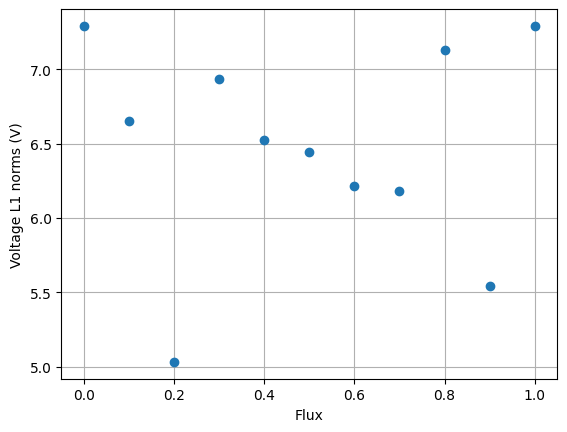

In [264]:
initial_fluxes = [0, 0.2, 0.5, 0.4, 0, 0, 0.1, 0]
initial_fluxes = [0]*8

channel_to_sweep = 1
flux_sweep = np.linspace(0, 1, 11)

print(f'initial fluxes: {initial_fluxes}')
print(f'sweeping channel {channel_to_sweep}')

print('\n'*2)

single_channel_threshold = 4

voltage_data = np.zeros((len(flux_sweep), len(initial_fluxes)))

voltage_norms = []

fluxes = np.copy(initial_fluxes).astype(float)

for i in range(len(flux_sweep)):
    
    fluxes[channel_to_sweep] = flux_sweep[i]
    
    print(f'targeting flux: {fluxes}')
    optimal_adjustments = integer_programming_get_combination(fluxes, single_channel_threshold=single_channel_threshold)
    print("Optimal Adjustments:", optimal_adjustments)

    optimal_fluxes = fluxes + optimal_adjustments
    voltages = flux_to_voltage(optimal_fluxes)
    print(f'optimal fluxes: {optimal_fluxes}')
    print(voltages)
    voltage_norm = np.linalg.norm(voltages, ord=1)
    print(voltage_norm)
    voltage_norms.append(voltage_norm)
    
    print()
    
    
plt.plot(flux_sweep, voltage_norms, marker='o', linestyle='')
plt.ylabel('Voltage L1 norms (V)')
plt.xlabel('Flux')

plt.grid()
plt.show()

# 4. Crosstalk Measurements
Generate a set of voltages with certain constraints on flux and measure qubit frequency

### 4.1 Create Bounds

In [726]:
# flux points for Q2, Q3, Q4 to set them at 4.5
flux_points_4500 = [-0.295, 0.314, -0.317, 0, 0, 0, 0, 0]

flux_points_4500 = np.array(flux_points_4500)

# don't include flux points in this bandwidth
flux_bandwidth = 0.1
bounds = []

fixed_qubit_indices = [0, 3]

for i in range(len(flux_points_4500)):
    bounds.append([])
    if not i in fixed_qubit_indices:
        if i in (0, 1, 2):
            # qubit bounds for not fixed qubits
            flux_point_abs = abs(flux_points_4500[i])
            bounds[i].append((-flux_point_abs + flux_bandwidth, flux_point_abs - flux_bandwidth))
            bounds[i].append((flux_point_abs + flux_bandwidth, 1 - flux_point_abs - flux_bandwidth))
        elif i > 2:
            # coupler bounds
            bounds[i].append((0.3, 0.7))
        
        
for i in range(len(bounds)):
    print(bounds[i])


[]
[(-0.214, 0.214), (0.41400000000000003, 0.586)]
[(-0.217, 0.217), (0.41700000000000004, 0.5830000000000001)]
[]
[(0.3, 0.7)]
[(0.3, 0.7)]
[(0.3, 0.7)]
[(0.3, 0.7)]


In [727]:
def create_fixed_qubit_bounds(flux_points, fixed_qubit_indices, flux_bandwidth):
    # keep one qubit at the same flux point (same frequency) and make sure the other qubits are away from that frequency
    bounds = []
    for i in range(len(flux_points)):
        bounds.append([])
        if not i in fixed_qubit_indices:
            if i in (0, 1, 2):
                # qubit bounds for not fixed qubits
                flux_point_abs = abs(flux_points[i])
                bounds[i].append((-flux_point_abs + flux_bandwidth, flux_point_abs - flux_bandwidth))
                bounds[i].append((flux_point_abs + flux_bandwidth, 1 - flux_point_abs - flux_bandwidth))
            elif i > 2:
                # coupler bounds
                bounds[i].append((0.3, 0.7))
    return bounds

In [728]:
def create_fixed_qubit_coupler_bounds(flux_points, fixed_indices, qubit_limit, coupler_limit):
    # keep one qubit at the sweet spot and make sure the other qubits are away from their sweet spot
    # keep one coupler at its linear part
    bounds = []
    for i in range(len(flux_points)):
        bounds.append([])
        if not i in fixed_indices:
            if i in (0, 1, 2):
                # qubit bounds for not fixed qubits
                bounds[i].append((qubit_limit, 1-qubit_limit))
            elif i > 2:
                # coupler bounds
                bounds[i].append((coupler_limit, 1-coupler_limit))
    return bounds

In [729]:
# flux points for Q2, Q3, Q4 to set them at 4.5
flux_points_4500 = [-0.295, 0.314, -0.317, 0, 0, 0, 0, 0]

flux_points_4500 = np.array(flux_points_4500)

# don't include flux points in this bandwidth
flux_bandwidth = 0.1

fixed_qubit_indices = [0]

bounds_4500 = create_fixed_qubit_bounds(flux_points_4500, fixed_qubit_indices, flux_bandwidth)

for i in range(len(bounds_4500)):
    print(bounds_4500[i])

[]
[(-0.214, 0.214), (0.41400000000000003, 0.586)]
[(-0.217, 0.217), (0.41700000000000004, 0.5830000000000001)]
[(0.3, 0.7)]
[(0.3, 0.7)]
[(0.3, 0.7)]
[(0.3, 0.7)]
[(0.3, 0.7)]


In [507]:
flux_points_test = np.array([-0.295, 0.8, 0.8, 0, 0, 0, 0, 0])

integer_programming(flux_points_test)

array([-0.20709595, -1.06702956,  0.06053934, -0.17600807,  0.34503945,
        1.12926504,  0.61851785, -2.78657234])

In [ ]:
[-0.289344353793625,0.4847882722256165, -0.6798736823903174,-1.0323361728723484,-0.016710605443833515,-1.0439782355278688,-0.9087518711438083,1.749187954573678]


In [730]:
# limit the non-fixed qubits and couplers
qubit_limit = 0.28
coupler_limit = 0.3

# keep Q2 at sweet spot and C12 at linear spot
fixed_indices = [0, 3]
# fixed_indices = [0]
flux_points_Q2_C12 = np.array([0, 0, 0, -0.015, 0, 0, 0, 0])

Q2_C12_bounds = create_fixed_qubit_coupler_bounds(flux_points_Q2_C12, fixed_indices, qubit_limit, coupler_limit)

for i in range(len(Q2_C12_bounds)):
    print(Q2_C12_bounds[i])

[]
[(0.28, 0.72)]
[(0.28, 0.72)]
[]
[(0.3, 0.7)]
[(0.3, 0.7)]
[(0.3, 0.7)]
[(0.3, 0.7)]


In [769]:
# limit the non-fixed qubits and couplers
qubit_limit = 0.28
coupler_limit = 0.3

# keep Q4 at sweet spot and C34 at linear spot
fixed_indices = [2, 7]
# fixed_indices = [0]
flux_points_Q4_C34 = np.array([0, 0, 0, 0, 0, 0, 0, -0.01])

Q4_C34_bounds = create_fixed_qubit_coupler_bounds(flux_points_Q4_C34, fixed_indices, qubit_limit, coupler_limit)

for i in range(len(Q4_C34_bounds)):
    print(Q4_C34_bounds[i])

[(0.28, 0.72)]
[(0.28, 0.72)]
[]
[(0.3, 0.7)]
[(0.3, 0.7)]
[(0.3, 0.7)]
[(0.3, 0.7)]
[]


### 4.2 Generate Random Fluxes

In [ ]:
num_random_samples = 50

random_fluxes = np.zeros((num_random_samples, len(flux_points_4500)))

for i in range(num_random_samples):
    for j in range(len(flux_points_4500)):
        # if more than one range in bounds, pick one at random
        if len(bounds[j]) > 0:
            flux_range = random.choice(bounds[j])
        else:
            flux_range = bounds[j]
        
        if len(flux_range) > 0:
            random_flux = random.uniform(*flux_range)
        else:
            random_flux = flux_points_4500[j]
        random_fluxes[i, j] = random_flux
        
print(np.round(random_fluxes, 3))
print(len(random_fluxes))

In [732]:
def generate_random_fluxes(flux_points, bounds, num_random_samples):

    random_fluxes = np.zeros((num_random_samples, len(flux_points)))

    for i in range(num_random_samples):
        for j in range(len(flux_points)):
            # if more than one range in bounds, pick one at random
            if len(bounds[j]) > 0:
                flux_range = random.choice(bounds[j])
            else:
                flux_range = bounds[j]

            if len(flux_range) > 0:
                random_flux = random.uniform(*flux_range)
            else:
                random_flux = flux_points[j]
            random_fluxes[i, j] = random_flux
            
    return random_fluxes



In [ ]:
random_fluxes = generate_random_fluxes(flux_points_4500, bounds, num_random_samples)

print(np.round(random_fluxes, 3))
print(len(random_fluxes))

In [675]:
# Q2 at sweet spot, C12 at linear part
num_random_samples = 80
random_fluxes_Q2_C12 = generate_random_fluxes(flux_points_Q2_C12, Q2_C12_bounds, num_random_samples)

print(np.round(random_fluxes_Q2_C12, 3))
print(len(random_fluxes_Q2_C12))

[[ 0.     0.321  0.603 -0.015  0.336  0.508  0.604  0.383]
 [ 0.     0.376  0.293 -0.015  0.675  0.697  0.301  0.653]
 [ 0.     0.314  0.496 -0.015  0.631  0.602  0.518  0.594]
 [ 0.     0.661  0.4   -0.015  0.55   0.304  0.479  0.609]
 [ 0.     0.59   0.705 -0.015  0.419  0.582  0.64   0.399]
 [ 0.     0.71   0.453 -0.015  0.606  0.49   0.525  0.612]
 [ 0.     0.351  0.33  -0.015  0.599  0.528  0.624  0.516]
 [ 0.     0.366  0.402 -0.015  0.622  0.679  0.312  0.458]
 [ 0.     0.283  0.391 -0.015  0.566  0.506  0.675  0.635]
 [ 0.     0.52   0.318 -0.015  0.55   0.4    0.412  0.544]
 [ 0.     0.384  0.399 -0.015  0.576  0.561  0.672  0.536]
 [ 0.     0.452  0.401 -0.015  0.365  0.464  0.647  0.349]
 [ 0.     0.507  0.476 -0.015  0.59   0.336  0.343  0.427]
 [ 0.     0.704  0.4   -0.015  0.636  0.65   0.699  0.605]
 [ 0.     0.654  0.446 -0.015  0.562  0.356  0.624  0.625]
 [ 0.     0.606  0.592 -0.015  0.577  0.347  0.698  0.696]
 [ 0.     0.652  0.644 -0.015  0.607  0.383  0.648  0.44

In [825]:
# Q4 at sweet spot, C34 at linear part
num_random_samples = 80
random_fluxes_Q4_C34 = generate_random_fluxes(flux_points_Q4_C34, Q4_C34_bounds, num_random_samples)

print(np.round(random_fluxes_Q4_C34, 3))
print(len(random_fluxes_Q4_C34))

[[ 0.339  0.547  0.     0.688  0.338  0.583  0.377 -0.01 ]
 [ 0.327  0.319  0.     0.335  0.636  0.661  0.593 -0.01 ]
 [ 0.708  0.659  0.     0.388  0.311  0.46   0.671 -0.01 ]
 [ 0.712  0.55   0.     0.616  0.643  0.352  0.44  -0.01 ]
 [ 0.304  0.468  0.     0.41   0.671  0.458  0.573 -0.01 ]
 [ 0.573  0.354  0.     0.54   0.414  0.616  0.587 -0.01 ]
 [ 0.561  0.361  0.     0.478  0.553  0.527  0.555 -0.01 ]
 [ 0.38   0.641  0.     0.352  0.598  0.403  0.325 -0.01 ]
 [ 0.647  0.553  0.     0.535  0.454  0.458  0.396 -0.01 ]
 [ 0.404  0.64   0.     0.515  0.672  0.633  0.386 -0.01 ]
 [ 0.648  0.671  0.     0.483  0.644  0.564  0.335 -0.01 ]
 [ 0.477  0.668  0.     0.393  0.565  0.54   0.39  -0.01 ]
 [ 0.584  0.462  0.     0.47   0.618  0.336  0.479 -0.01 ]
 [ 0.497  0.603  0.     0.499  0.636  0.592  0.443 -0.01 ]
 [ 0.325  0.481  0.     0.497  0.335  0.444  0.439 -0.01 ]
 [ 0.398  0.552  0.     0.52   0.538  0.404  0.636 -0.01 ]
 [ 0.405  0.625  0.     0.576  0.333  0.316  0.64  -0.01

### 4.3 Convert to random voltages

In [440]:
random_voltages = np.zeros(random_fluxes.shape)

random_voltages = []

for i in range(len(random_fluxes)):
    
    fluxes = random_fluxes[i,:]
    optimal_adjustments = integer_programming_get_combination(fluxes, single_channel_threshold=single_channel_threshold)
    optimal_fluxes = fluxes + optimal_adjustments
    
    
    # keep one qubit flux fixed
    # only include these points if fixed indices flux does not change
    if all(optimal_fluxes[fixed_qubit_indices] == flux_points_4500[fixed_qubit_indices]):
        
        
        print(np.round(optimal_fluxes, 3))

        voltages = flux_to_voltage(optimal_fluxes)

        print(np.round(voltages, 3))

        voltage_norm = np.linalg.norm(voltages, ord=1)
        print(voltage_norm)

        random_voltages.append(voltages)
    
random_voltages = np.array(random_voltages)
print(len(random_voltages))

[-0.295  0.314  0.444 -0.645  0.612 -0.508  0.477 -0.431]
[-0.278  0.201  1.693 -1.367  0.35  -0.221  0.771 -0.834]
5.715304709820907
[-0.295  0.314  0.044 -0.434  0.467 -0.331  0.321 -0.312]
[-0.268  0.248  0.574 -1.712  0.526  0.057 -1.376  1.233]
5.994462148287194
[-0.295  0.314  0.11  -0.315  0.465 -0.597  0.52   0.422]
[-0.285  0.167  0.777 -0.344 -0.359 -0.645  0.117  0.843]
3.5368302760699217
[-0.295  0.314 -0.51   0.301  0.46  -0.307  0.368 -0.628]
[-0.244  0.254 -0.885 -0.014 -0.063  0.163 -0.556  0.343]
2.522822425725102
[-0.295  0.314  0.523 -0.451  0.384 -0.512  0.649  0.541]
[-0.295  0.15   1.902  0.188 -0.999 -0.292  1.431 -0.125]
5.3835033019976315
[-0.295  0.314  0.437  0.309  0.664 -0.437  0.501  0.352]
[-0.259  0.224  1.606 -0.194  0.841 -0.136 -0.107  1.359]
4.726526854795299
[-0.295  0.314  0.428  0.605  0.578 -0.436  0.65   0.529]
[-0.26   0.189  1.621  1.56  -0.367 -0.044  1.578  0.182]
5.800680037332269
[-0.295  0.314  0.816 -0.405  0.529 -0.328  0.41   0.322]
[-

In [763]:
def convert_to_random_voltages(random_fluxes, flux_points, fixed_indices, single_channel_threshold=4):
    random_voltages = []
    
    norm_sum = 0
    voltage_norms = []
    
    for i in range(len(random_fluxes)):

        fluxes = random_fluxes[i,:]
#         optimal_adjustments = integer_programming_get_combination(fluxes, single_channel_threshold=single_channel_threshold, fixed_indices=fixed_indices)
        optimal_adjustments = integer_programming_get_combination(fluxes, single_channel_threshold=single_channel_threshold)
        optimal_fluxes = fluxes + optimal_adjustments
        
        print(f'fluxes: {np.round(fluxes, 2)}')
        print(f'optimal adjustments: {optimal_adjustments}')
        
        # keep one qubit flux fixed
        # only include these points if fixed indices flux does not change
        if all(optimal_fluxes[fixed_indices] == flux_points[fixed_indices]):


            print(np.round(optimal_fluxes, 3))

            voltages = flux_to_voltage(optimal_fluxes)

            print(np.round(voltages, 3))

            voltage_norm = np.linalg.norm(voltages, ord=1)
            voltage_norms.append(voltage_norm)
            print(voltage_norm)

            random_voltages.append(voltages)
            
    random_voltages = np.array(random_voltages)
    
    print(f'norm sum: {np.sum(voltage_norms)}')
    
    plt.plot(voltage_norms, marker='o', linestyle='')
    plt.show()
    
    return random_voltages



[ 0.     0.321 -0.397 -0.015  0.336 -0.492  0.604  0.383]
[ 0.548  0.177 -0.536  1.339 -1.701 -0.323  1.326 -0.205]
6.154560787437223
[ 0.     0.314  0.496 -0.015  0.631 -0.398  0.518  0.594]
[ 0.557  0.199  1.806  0.269  0.016 -0.011  0.689  0.775]
4.321439458004828
[ 0.     0.71   0.453 -0.015  0.606 -0.51   0.525 -0.388]
[ 5.650e-01  1.276e+00  1.727e+00  1.510e-01  1.000e-03 -7.800e-02
  1.602e+00 -1.342e+00]
6.7426461611270065
[ 0.     0.351  0.33  -0.015  0.599 -0.472  0.624  0.516]
[ 0.553  0.303  1.325 -0.5    0.685 -0.198  0.394  1.156]
5.114782437405285
[ 0.     0.366  0.402 -0.015  0.622 -0.321  0.312  0.458]
[ 0.566  0.364  1.564  0.337 -0.242  0.113 -0.213  1.137]
4.5359113358600975
[ 0.     0.384  0.399 -0.015  0.576 -0.439  0.672  0.536]
[ 0.552  0.413  1.469 -1.271  1.408 -0.102 -0.175  1.878]
7.268176186599938
[ 0.    -0.394 -0.408 -0.015  1.577 -0.653 -0.302 -0.304]
[ 0.609 -1.693 -0.479  0.361  0.742 -1.067 -0.788 -0.079]
5.818283719118363
[ 0.    -0.348 -0.356 -0.01

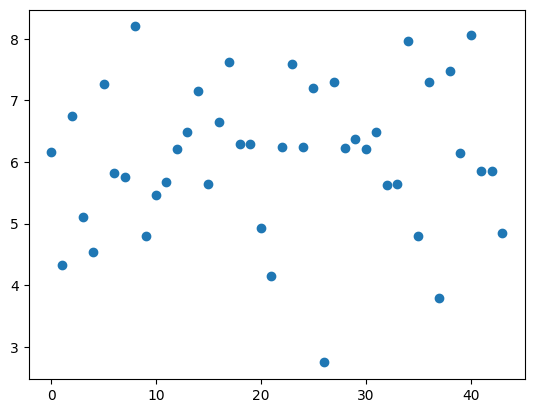

44


In [676]:
# Q2 at sweet spot, C12 at linear part
single_channel_threshold = 2

random_voltages_Q2_C12 = convert_to_random_voltages(random_fluxes_Q2_C12, flux_points_Q2_C12, fixed_indices, single_channel_threshold=single_channel_threshold)

print(len(random_voltages_Q2_C12))

fluxes: [ 0.34  0.55  0.    0.69  0.34  0.58  0.38 -0.01]
optimal adjustments: [-1.  0.  0.  0.  0. -1.  0.  0.]
[-0.661  0.547  0.     0.688  0.338 -0.417  0.377 -0.01 ]
[-1.273  0.854  0.466  1.304 -0.857 -0.105 -0.524  0.959]
6.342685194443767
fluxes: [ 0.33  0.32  0.    0.33  0.64  0.66  0.59 -0.01]
optimal adjustments: [-0.53316967 -0.09192279 -0.188      -0.24261812 -0.00515013 -1.0392373
 -0.24793193 -0.20609523]
fluxes: [ 0.71  0.66  0.    0.39  0.31  0.46  0.67 -0.01]
optimal adjustments: [-1.  0.  0.  0.  0. -1.  0.  0.]
[-0.292  0.659  0.     0.388  0.311 -0.54   0.671 -0.01 ]
[-0.26   1.118  0.475  0.951 -0.73  -0.273  1.117 -0.193]
5.116171273879057
fluxes: [ 0.71  0.55  0.    0.62  0.64  0.35  0.44 -0.01]
optimal adjustments: [-1.  0.  0.  0.  0. -1.  0.  0.]
[-0.288  0.55   0.     0.616  0.643 -0.648  0.44  -0.01 ]
[-0.23   0.823  0.514  1.609 -0.561 -0.634  1.007 -0.374]
5.752923424896012
fluxes: [ 0.3   0.47  0.    0.41  0.67  0.46  0.57 -0.01]
optimal adjustments: [-1

fluxes: [ 0.35  0.46  0.    0.43  0.34  0.42  0.56 -0.01]
optimal adjustments: [ 0.  0.  0.  0.  1. -1. -1.  0.]
[ 0.352  0.46   0.     0.429  1.34  -0.575 -0.444 -0.01 ]
[ 1.603  0.628  0.612  1.931 -0.347 -0.767 -1.136  0.414]
7.437722980891967
fluxes: [ 0.46  0.59  0.    0.43  0.63  0.52  0.42 -0.01]
optimal adjustments: [-1.  0.  0.  1.  0. -1.  0.  0.]
[-0.542  0.589  0.     1.425  0.627 -0.475  0.424 -0.01 ]
[-0.915  0.997  0.424  1.516  0.637 -0.196 -0.536  1.462]
6.6821969807612245
fluxes: [ 0.6   0.37  0.    0.6   0.45  0.55  0.56 -0.01]
optimal adjustments: [-1.  0.  0. -1.  0. -1.  0. -1.]
fluxes: [ 0.59  0.58  0.    0.53  0.48  0.61  0.42 -0.01]
optimal adjustments: [-1. -1.  0. -2.  0. -1.  0.  0.]
[-0.412 -0.424  0.    -1.471  0.481 -0.395  0.419 -0.01 ]
[-0.632 -1.846  0.582 -0.986 -1.626 -0.182  1.06  -1.082]
7.996565293985123
fluxes: [ 0.42  0.54  0.    0.56  0.6   0.53  0.66 -0.01]
optimal adjustments: [-1.  0.  0.  1.  0. -1.  0.  0.]
[-0.577  0.539  0.     1.559  0.

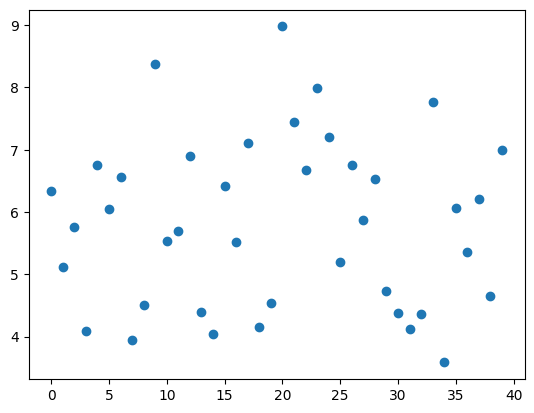

40


In [826]:
# Q4 at sweet spot, C34 at linear part
single_channel_threshold = 2

random_voltages_Q4_C34 = convert_to_random_voltages(random_fluxes_Q4_C34, flux_points_Q4_C34, fixed_indices, single_channel_threshold=single_channel_threshold)

print(len(random_voltages_Q4_C34))

In [ ]:
# 8
norm sum: 570.5836330978531
96

In [ ]:
# 4
norm sum: 570.5836330978531
96

In [ ]:
# 2
norm sum: 568.0666552972407
93

In [ ]:
# 2
norm sum: 568.0666552972407
93

In [503]:
for row in random_voltages_Q2_C12:
    print(np.round(row, 3))
print(len(random_voltages_Q2_C12))

[ 0.57   0.903 -0.927  1.291 -1.14  -0.192 -0.723  1.65 ]
[ 0.538  0.549  1.506 -1.027  0.389 -0.75   0.309  0.761]
[ 0.55   0.23   2.093  0.513 -0.724 -0.286  1.348 -0.45 ]
3


[[ 0.55  0.18 -0.54  1.34 -1.7  -0.32  1.33 -0.2 ]
 [ 0.56  0.2   1.81  0.27  0.02 -0.01  0.69  0.78]
 [ 0.57  1.28  1.73  0.15  0.   -0.08  1.6  -1.34]
 [ 0.55  0.3   1.33 -0.5   0.68 -0.2   0.39  1.16]
 [ 0.57  0.36  1.56  0.34 -0.24  0.11 -0.21  1.14]
 [ 0.55  0.41  1.47 -1.27  1.41 -0.1  -0.17  1.88]
 [ 0.61 -1.69 -0.48  0.36  0.74 -1.07 -0.79 -0.08]
 [ 0.62 -1.55 -0.33  0.24  0.87 -0.93 -0.81 -0.4 ]
 [ 0.57  0.44 -1.25  1.04 -1.25 -0.71  1.2  -1.73]
 [ 0.56  0.87  1.61  0.08 -0.01 -0.3  -0.13  1.25]
 [ 0.57  0.51 -0.54  0.17 -0.18 -0.68  1.41 -1.4 ]
 [ 0.58  0.93  1.33 -0.73  0.78  0.31  0.46 -0.56]
 [ 0.62  0.76 -0.15 -0.24  0.73 -0.96 -1.46 -1.28]
 [ 0.56  0.92 -0.68  0.61 -1.18 -0.66 -0.65  1.22]
 [ 0.57  1.28  1.97 -1.09  1.2   0.3   0.41 -0.33]
 [ 0.55  0.12 -1.25  0.57 -1.08 -0.59 -0.25  1.23]
 [ 0.57  0.88  1.81  0.25 -0.01  0.16  1.6  -1.37]
 [ 0.55  0.96  1.65  1.46 -1.7   0.16  0.54  0.6 ]
 [ 0.61 -1.55 -0.1   1.64 -0.85 -0.32 -0.71 -0.52]
 [ 0.61  0.57  1.75  0.29  0.65

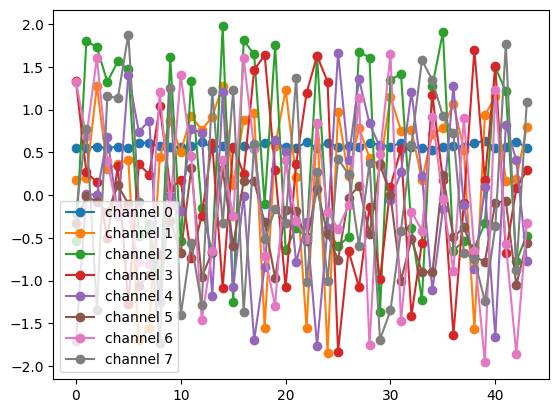

In [677]:
print(np.round(random_voltages_Q2_C12, 2))

for i in range(random_voltages_Q2_C12.shape[1]):
    plt.plot(random_voltages_Q2_C12[:,i], marker='o', label=f'channel {i}')
    
plt.legend()

In [636]:
random_voltages_Q2_C12[0,:]

array([ 0.58172109,  0.67904059, -1.09411283, -1.59519275,  1.1962755 ,
        0.17718958,  0.31872078, -1.19417411])

In [772]:
random_voltages_Q4_C34[0,:]

array([-0.69641028,  0.453577  ,  0.48170204, -1.10087893, -0.63853379,
       -0.4876241 , -1.13359574,  1.03752889])

### 4.4 Export random voltages

In [787]:
def export_random_voltages(random_voltages):

    now = datetime.datetime.now()
    current_datetime_string = now.strftime('%Y-%m%d_%H%M')

    directory_name = f'random_voltages_{now.strftime("%Y-%m%d")}'
    
    random_voltages_directory = r'voltage_sweeps\{}'.format(directory_name)

#     random_voltages_directory = r'V:\QSimMeasurements\Measurements\4Q_Triangle_Lattice\voltage_sweeps\{}'.format(directory_name)
    os.makedirs(random_voltages_directory, exist_ok=True)


    filename = rf'random_voltages_{current_datetime_string}.csv'

    filepath = os.path.join(random_voltages_directory, filename)
    
    print(random_voltages_directory)
    print(os.path.join(random_voltages_directory, 'random_voltages_{}.csv'.format(current_datetime_string)))

    filepath = os.path.join(random_voltages_directory, 'random_voltages_{}.csv'.format(current_datetime_string))
    print(f'saving to: {filepath}')


    with open(filepath, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')

        for i in range(random_voltages.shape[0]):
            writer.writerow(random_voltages[i,:])

In [678]:
export_random_voltages(random_voltages_Q2_C12)

saving to: V:\QSimMeasurements\Measurements\4Q_Triangle_Lattice\voltage_sweeps\random_voltages_2024-0726\random_voltages_2024-0726_1709.csv


In [827]:
export_random_voltages(random_voltages_Q4_C34)

voltage_sweeps\random_voltages_2024-0729
voltage_sweeps\random_voltages_2024-0729\random_voltages_2024-0729_1131.csv
saving to: voltage_sweeps\random_voltages_2024-0729\random_voltages_2024-0729_1131.csv


# 4.5 Create Sweep Measurement

In [823]:
def export_voltages(voltages):

    now = datetime.datetime.now()
    current_datetime_string = now.strftime('%Y-%m%d_%H%M')

    directory_name = f'voltages_{now.strftime("%Y-%m%d")}'

    random_voltages_directory = r'voltage_sweeps\{}'.format(directory_name)
    
#     random_voltages_directory = r'V:\QSimMeasurements\Measurements\4Q_Triangle_Lattice\voltage_sweeps\{}'.format(directory_name)
    os.makedirs(random_voltages_directory, exist_ok=True)


    filename = rf'voltages_{current_datetime_string}.csv'

    filepath = os.path.join(random_voltages_directory, filename)


    filepath = os.path.join(random_voltages_directory, r'voltages_{}.csv'.format(current_datetime_string))
    print(f'saving to: {filepath}')


    with open(filepath, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')

        for i in range(voltages.shape[0]):
            writer.writerow(voltages[i,:])

In [846]:
num_channels = 8
num_points = 21

single_channel_threshold = 2.01

flux_sweep_points = np.zeros((num_points, num_channels))

# sweep C12

constant_values = [0, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5]

# sweep C34

constant_values = [0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0]

# sweep C12 and C23
constant_values = [0, 0.5, 0.5, 0, 0.5, 0, 0.5, 0.5]

for i in range(len(constant_values)):
    flux_sweep_points[:, i] = [constant_values[i]]*num_points
    
# flux_sweep_points[:,3] = np.linspace(-0.025, 0.025, flux_sweep_points.shape[0])
flux_sweep_points[:,3] = np.linspace(-0.05, 0.5, flux_sweep_points.shape[0])

print(np.round(flux_sweep_points, 4))

voltage_sweep_points = np.zeros(flux_sweep_points.shape)

for i in range(voltage_sweep_points.shape[0]):

    fluxes = flux_sweep_points[i,:]
    optimal_adjustments = integer_programming_get_combination(fluxes, single_channel_threshold=single_channel_threshold)
    print(optimal_adjustments)
    optimal_fluxes = fluxes + optimal_adjustments

    voltages = flux_to_voltage(optimal_fluxes)

    voltage_sweep_points[i,:] = voltages
    
print(np.round(voltage_sweep_points, 2))

flux_sweep_points[:,7]


[[ 0.      0.5     0.5    -0.05    0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5    -0.0225  0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.005   0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.0325  0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.06    0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.0875  0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.115   0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.1425  0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.17    0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.1975  0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.225   0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.2525  0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.28    0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.3075  0.5     0.      0.5     0.5   ]
 [ 0.      0.5     0.5     0.335   0.5     0.      0.5     0.5

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [847]:
print(np.round(voltage_sweep_points, 2))


[[ 0.52  0.62 -0.82 -1.78 -0.24 -1.74  0.08 -0.09]
 [ 0.52  0.62 -0.81 -1.56 -0.4  -1.73  0.26 -0.27]
 [ 0.52  0.62 -0.81 -1.34 -0.56 -1.72  0.44 -0.45]
 [ 0.52  0.61 -0.8  -1.12 -0.73 -1.71  0.62 -0.62]
 [ 0.52  0.61 -0.79 -0.9  -0.89 -1.71  0.8  -0.8 ]
 [ 0.52  0.6  -0.78 -0.67 -1.05 -1.7   0.98 -0.97]
 [ 0.58  0.8   1.83 -0.19  0.31  1.33  1.15 -1.2 ]
 [ 0.62  0.85 -0.94 -0.14  1.52  1.17 -0.77  0.93]
 [ 0.62  0.85 -0.93  0.08  1.36  1.18 -0.59  0.75]
 [ 0.62  0.85 -0.92  0.3   1.2   1.18 -0.42  0.58]
 [ 0.62  0.84 -0.91  0.52  1.03  1.19 -0.24  0.4 ]
 [ 0.62  0.84 -0.9   0.75  0.87  1.2  -0.06  0.23]
 [ 0.62  0.84 -0.9   0.97  0.71  1.21  0.12  0.05]
 [ 0.62  0.83 -0.89  1.19  0.55  1.21  0.3  -0.13]
 [ 0.62  0.83 -0.88  1.41  0.38  1.22  0.48 -0.3 ]
 [ 0.62  0.82 -0.87  1.63  0.22  1.23  0.66 -0.48]
 [ 0.55 -1.95 -0.86 -1.31  0.03  0.83 -0.29  0.98]
 [ 0.56 -1.95 -0.85 -1.08 -0.13  0.84 -0.11  0.8 ]
 [ 0.56 -1.95 -0.84 -0.86 -0.29  0.85  0.07  0.63]
 [ 0.56 -1.96 -0.83 -0.64 -0.45

In [848]:
export_voltages(voltage_sweep_points)

saving to: voltage_sweeps\voltages_2024-0729\voltages_2024-0729_1722.csv


In [649]:
print(np.round(voltage_sweep_points_copy - voltage_sweep_points, 2))

[[-0.01  0.03 -0.02 -2.99  1.35  0.1  -0.56 -0.81]
 [-0.01  0.03 -0.02 -2.99  1.34  0.1  -0.56 -0.81]
 [ 0.   -0.02  0.03  0.88 -0.65  0.03  0.72 -0.71]
 [ 0.   -0.02  0.03  0.88 -0.65  0.03  0.72 -0.71]
 [ 0.   -0.02  0.03  0.88 -0.65  0.03  0.72 -0.71]
 [ 0.   -0.02  0.03  0.89 -0.65  0.03  0.72 -0.72]
 [ 0.   -0.02  0.03  0.89 -0.65  0.03  0.73 -0.72]
 [ 0.   -0.02  0.03  0.89 -0.66  0.03  0.73 -0.72]
 [ 0.   -0.02  0.03  0.89 -0.66  0.03  0.73 -0.72]
 [ 0.   -0.02  0.03  0.9  -0.66  0.03  0.73 -0.73]
 [ 0.   -0.02  0.03  0.9  -0.66  0.03  0.74 -0.73]
 [ 0.   -0.02  0.03  0.9  -0.67  0.03  0.74 -0.73]
 [ 0.   -0.02  0.03  0.91 -0.67  0.03  0.74 -0.73]
 [ 0.1   0.11  0.07  1.09  1.68 -0.16 -2.4   0.12]
 [ 0.1   0.11  0.07  1.1   1.68 -0.16 -2.4   0.12]
 [ 0.1   0.11  0.07  1.1   1.68 -0.16 -2.4   0.12]
 [-0.04  0.01  2.57 -3.09  1.78 -0.13 -2.21  3.17]
 [-0.04  0.01  2.57 -3.08  1.78 -0.13 -2.2   3.16]
 [-0.13 -0.12  2.53 -3.27 -0.57  0.07  0.94  2.31]
 [-0.13 -0.12  2.53 -3.27 -0.57

read in random voltage data set that we used to fit C34, use the crosstalk matrix 3 to convert it back to the flux values, then use crosstalk matrix 4 to convert it to new voltages and run that scan

In [829]:
C34_fit_voltage_set_filename = r'C:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice\Jupyter Notebooks\crosstalk analysis\voltage_sweeps\random_voltages_2024-0728\random_voltages_2024-0728_1532.csv'

In [830]:
C34_fit_voltage_set = []

with open(C34_fit_voltage_set_filename, 'r') as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        C34_fit_voltage_set.append(np.array(row).astype(float))
        
C34_fit_voltage_set = np.array(C34_fit_voltage_set)
print(C34_fit_voltage_set)

[[-0.47250461  0.94439026  0.38216419 -1.49222417 -0.58554619  0.5098928
   1.74904651 -0.03172557]
 [-0.87609264  0.89403863  0.32017105  0.17210942  1.98338218  0.09308217
   1.81934027  0.75306653]
 [-1.41425715  0.34370821  0.49647597  1.28820635 -1.05948662 -0.42509957
   0.66505253 -0.1038864 ]
 [-0.21776289 -1.96738341  0.68602452  1.15538147 -1.17620765 -1.12960356
  -0.47700827 -0.72662199]
 [-0.62838529  0.81180654  0.49874496  0.77512902 -0.47361004 -0.72670264
  -0.06725163  0.33151634]
 [-0.62433953  0.19469889  0.44327846  0.08858882  0.29739395 -0.10793974
   0.56976215  0.48015345]
 [-0.97615406  0.21634588  0.47186154  0.48789356 -0.03614489 -0.59460562
   0.99611254 -0.10007327]
 [ 1.44070103  0.70832099  0.49870332 -0.52978135 -0.23432778  0.03739339
   0.9853535  -0.28376944]
 [-0.74119598  0.85690527  0.46888196  1.04553028 -0.50773114 -0.23951962
   0.25947253  0.42470304]
 [-0.92415263 -1.68431457  0.54926783 -1.97525667 -1.07794981 -0.41786216
  -0.06212232 -0.1

In [841]:
C34_fit_flux_set_new = []

for i in range(len(C34_fit_voltage_set)):
    C34_fit_flux_set_new.append(voltage_to_flux(C34_fit_voltage_set[i,:]))
    
C34_fit_flux_set_new = np.array(C34_fit_flux_set_new)
print(np.round(C34_fit_flux_set_new, 2))
C34_fit_flux_set_new

[[-0.35  0.6  -0.   -0.49 -0.38 -0.31  1.32 -0.05]
 [-0.52  0.56 -0.    1.46  0.3  -0.5   1.31 -0.04]
 [-0.71  0.37  0.    0.42  0.39 -0.55  0.51 -0.01]
 [-0.29 -0.48 -0.   -0.6   1.44 -0.65 -0.48  0.  ]
 [-0.43  0.54  0.    0.32  0.57 -0.65  0.34 -0.03]
 [-0.42  0.31  0.    0.39  0.46 -0.46  0.68 -0.03]
 [-0.55  0.33 -0.    0.37  0.52 -0.64  0.65 -0.02]
 [ 0.32  0.5  -0.   -0.43  0.46 -0.4   0.58 -0.07]
 [-0.47  0.55  0.    0.59  0.41 -0.5   0.51 -0.03]
 [-0.51 -0.37 -0.   -1.64  0.46 -0.46  0.36  0.  ]
 [-0.45  0.34  0.   -0.44  0.49 -0.64  0.41 -0.02]
 [-0.4   0.28  0.    0.31  0.47 -0.43  0.67 -0.02]
 [ 0.31 -0.45 -0.   -0.44  1.6  -0.37 -0.56 -0.03]
 [-0.56  0.39 -0.   -0.43  0.32 -0.56  0.31 -0.02]
 [-0.32  0.39 -0.    0.45  0.63 -0.59  0.65 -0.03]
 [ 0.43  0.29 -0.   -0.38  1.31 -0.52 -0.65 -0.05]
 [-0.56  0.28  0.   -0.47  0.34 -0.58  0.48 -0.01]
 [-0.53  0.36 -0.    0.31  0.46 -0.45  0.38 -0.01]
 [-0.42 -0.44 -0.   -1.49  0.62 -0.52  0.36 -0.01]
 [ 0.33 -0.32 -0.   -1.32  1.33

array([[-3.49177774e-01,  5.95437646e-01, -2.77555756e-17,
        -4.90867745e-01, -3.75887611e-01, -3.08288737e-01,
         1.31604907e+00, -4.85104488e-02],
       [-5.17398998e-01,  5.58018238e-01, -2.77555756e-17,
         1.46445531e+00,  3.03744286e-01, -4.97464855e-01,
         1.30654354e+00, -3.89557350e-02],
       [-7.06596366e-01,  3.73778580e-01,  0.00000000e+00,
         4.21161640e-01,  3.94358787e-01, -5.54942116e-01,
         5.10294746e-01, -1.15710794e-02],
       [-2.87796165e-01, -4.76993022e-01, -1.11022302e-16,
        -5.99367930e-01,  1.44076718e+00, -6.46552869e-01,
        -4.77145367e-01,  1.14970685e-03],
       [-4.28123487e-01,  5.43709000e-01,  5.55111512e-17,
         3.23128619e-01,  5.71770741e-01, -6.50106323e-01,
         3.37663525e-01, -2.50816821e-02],
       [-4.24485192e-01,  3.06847006e-01,  2.77555756e-17,
         3.86666862e-01,  4.55697367e-01, -4.56182606e-01,
         6.77948997e-01, -2.61996315e-02],
       [-5.49095757e-01,  3.271558

In [837]:
C34_fit_voltage_set_new = []
single_channel_threshold = 2

for i in range(len(C34_fit_flux_set)):
    
    fluxes = C34_fit_flux_set[i,:]
    optimal_adjustments = integer_programming_get_combination(fluxes, single_channel_threshold=single_channel_threshold)
    print(optimal_adjustments)
    optimal_fluxes = fluxes + optimal_adjustments

    voltages = flux_to_voltage(optimal_fluxes)

    C34_fit_voltage_set_new.append(voltages)
    
C34_fit_voltage_set_new = np.array(C34_fit_voltage_set_new)
print(np.round(C34_fit_voltage_set_new, 2))

[0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.  0.  0. -2.  1.  0. -2. -1.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.  0.  0.  1. -1.  1.  1.  0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.  1.  0.  3.  1.  0. -1. -2.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[[-0.47  0.95  0.37 -1.65 -0.44  0.5   1

In [839]:
C34_fit_flux_set

array([[-3.49177774e-01,  5.95437646e-01, -2.77555756e-17,
        -4.90867745e-01, -3.75887611e-01, -3.08288737e-01,
         1.31604907e+00, -1.00000000e-02],
       [-5.17398998e-01,  5.58018238e-01, -2.77555756e-17,
         1.46445531e+00,  3.03744286e-01, -4.97464855e-01,
         1.30654354e+00, -1.00000000e-02],
       [-7.06596366e-01,  3.73778580e-01,  0.00000000e+00,
         4.21161640e-01,  3.94358787e-01, -5.54942116e-01,
         5.10294746e-01, -1.00000000e-02],
       [-2.87796165e-01, -4.76993022e-01, -1.11022302e-16,
        -5.99367930e-01,  1.44076718e+00, -6.46552869e-01,
        -4.77145367e-01, -1.00000000e-02],
       [-4.28123487e-01,  5.43709000e-01,  5.55111512e-17,
         3.23128619e-01,  5.71770741e-01, -6.50106323e-01,
         3.37663525e-01, -1.00000000e-02],
       [-4.24485192e-01,  3.06847006e-01,  2.77555756e-17,
         3.86666862e-01,  4.55697367e-01, -4.56182606e-01,
         6.77948997e-01, -1.00000000e-02],
       [-5.49095757e-01,  3.271558

In [838]:
export_random_voltages(C34_fit_voltage_set_new)

voltage_sweeps\random_voltages_2024-0729
voltage_sweeps\random_voltages_2024-0729\random_voltages_2024-0729_1323.csv
saving to: voltage_sweeps\random_voltages_2024-0729\random_voltages_2024-0729_1323.csv
